# 1. Overview of Cleaned Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Some information about the dataset after cleaning the data

In [2]:
cleaned_data = pd.read_csv('clean_depression_dataset_for_eda.csv')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166529 entries, 0 to 166528
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 166529 non-null  object 
 1   Age                                    166529 non-null  int64  
 2   City                                   166529 non-null  object 
 3   Working Professional or Student        166529 non-null  object 
 4   Profession                             166529 non-null  object 
 5   Academic Pressure                      166529 non-null  float64
 6   Work Pressure                          166529 non-null  float64
 7   CGPA                                   166529 non-null  float64
 8   Study Satisfaction                     166529 non-null  float64
 9   Job Satisfaction                       166529 non-null  float64
 10  Sleep Duration                         166529 non-null  

- There are no missing values in all 18 columns, showing that the dataset has been completely cleaned and ensures reliability for analysing

- The dataset contains a large sample size (166529 records) - suitable for statistical analysis, group comparisons, and predictive modeling

- The numeric variables have been standardised to the correct data types, solving original formating issues 

- The categorical variables have been cleaned for consistent capitalization, string formatting, and removal of irregular characters, making grouping and visualization much smoother

Check the number of unique values in each column

In [3]:
cleaned_data.nunique()


Gender                                     3
Age                                       43
City                                      30
Working Professional or Student            2
Profession                                10
Academic Pressure                          6
Work Pressure                              6
CGPA                                     355
Study Satisfaction                         6
Job Satisfaction                           6
Sleep Duration                             3
Dietary Habits                             3
Degree                                     4
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

### Variable classification

To support a structured and meaningful analysis, the variables in the cleaned dataset are categorized into 4 main groups based on their characteristics and analytical purpose:

- Binary variables (include target variable Depression): take only 2 possible values (0/1) and represent the presence or absence of specific mental-health-related conditions -> act as crucial predictors for understanding mental-health risks (Depression)

- Ordinal variables: follow a ranked or ordered scale, typically representing levels of pressure or satisfaction (from 1 to 5) -> help quantify the psychological burden individuals experience in academic or professional environments

- Numeric variables: are continuous or discrete numerical fields suitable for descriptive statistics and distribution analysis -> contribute contextual factors that may influence mental well-being

- Categorical variables: contain distinct groups or labels without inherent ordering -> provide demographic and lifestyle information - key components when studying how Depression prevalence varies by gender, cities, occupations, or sleep and dietary habits.

This classification ensures the use of appropriate statistical methods and helps reveal meaningful factors associated with Depression. With all variables cleaned and well-organized, the dataset is ready for further EDA, correlation analysis, and predictive modeling

In [4]:
binary_cols = ['Depression', 
               'Have you ever had suicidal thoughts ?',
               'Family History of Mental Illness']

ordinal_cols = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction',
                'Job Satisfaction',  'Financial Stress']

numeric_cols = ['Age', 'CGPA', 'Work/Study Hours']

categorical_cols = ['Gender', 'City', 'Working Professional or Student',
                    'Profession', 'Degree', 'Dietary Habits', 'Sleep Duration']


Some description about variables

In [5]:
# 1. BINARY COLUMNS
print(" BINARY VARIABLES \n")
for col in binary_cols:
    print(f"--- {col} ---")
    vc = cleaned_data[col].value_counts()
    mean_val = cleaned_data[col].mean()
    print(vc)
    print(f"Mean (rate of 1): {mean_val:.3f}")
    print("\n-----------------------------------\n")


# 2. ORDINAL COLUMNS 
print(" ORDINAL VARIABLES \n")
for col in ordinal_cols:
    print(f"--- {col} ---")
    print("Value counts:")
    print(cleaned_data[col].value_counts())
    print("\nSummary:")
    print(cleaned_data[col].describe()[['mean', '50%']])   # mean + median
    print("\n-----------------------------------\n")


# 3. NUMERIC COLUMNS
print(" NUMERIC VARIABLES \n")
for col in numeric_cols:
    print(f"--- {col} ---")
    print(cleaned_data[col].describe())   # đủ ý nghĩa
    print("\n-----------------------------------\n")


# 4. CATEGORICAL COLUMNS 
print(" CATEGORICAL VARIABLES \n")
for col in categorical_cols:
    print(f"--- {col} ---")
    print(cleaned_data[col].value_counts())
    print("\n-----------------------------------\n")


 BINARY VARIABLES 

--- Depression ---
Depression
0    136159
1     30370
Name: count, dtype: int64
Mean (rate of 1): 0.182

-----------------------------------

--- Have you ever had suicidal thoughts ? ---
Have you ever had suicidal thoughts ?
0    84149
1    82380
Name: count, dtype: int64
Mean (rate of 1): 0.495

-----------------------------------

--- Family History of Mental Illness ---
Family History of Mental Illness
0    83887
1    82642
Name: count, dtype: int64
Mean (rate of 1): 0.496

-----------------------------------

 ORDINAL VARIABLES 

--- Academic Pressure ---
Value counts:
Academic Pressure
0.0    133418
3.0      8847
5.0      7436
4.0      6157
1.0      5683
2.0      4988
Name: count, dtype: int64

Summary:
mean    0.624564
50%     0.000000
Name: Academic Pressure, dtype: float64

-----------------------------------

--- Work Pressure ---
Value counts:
Work Pressure
0.0    33111
2.0    28770
4.0    26632
5.0    26352
3.0    26238
1.0    25426
Name: count, dtype: i

In [6]:
count = (cleaned_data['Working Professional or Student'] == 'Working Professional').sum()
print(count)
print('Tỉ lệ người đi làm: ', count/len(cleaned_data)*100)

133418
Tỉ lệ người đi làm:  80.11697662269034


# 2. Analysis each variable

## 2.1. Numeric variables

In [7]:
# sns.set(style="whitegrid")

In [8]:
cleaned_data['Age'].describe()

count    166529.000000
mean         40.368873
std          12.367708
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

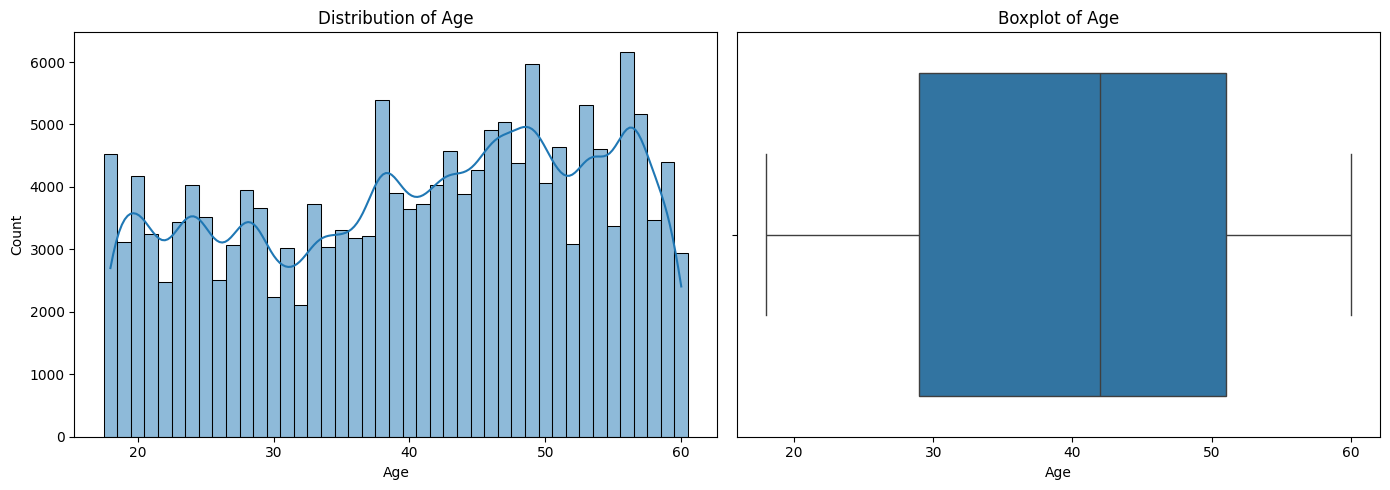

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE
sns.histplot(cleaned_data['Age'], kde=True, ax=axes[0], discrete=True)
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age")

# Boxplot
sns.boxplot(x=cleaned_data['Age'], ax=axes[1])
axes[1].set_title("Boxplot of Age")
axes[1].set_xlabel("Age")

plt.tight_layout()
plt.show()


- Phân phối: Histogram cho thấy độ tuổi trải dài từ 18 đến 60 tuổi, tập trung nhiều quanh 40-50 tuổi.  -> Dữ liệu chủ yếu nằm trong độ tuổi chín về sự nghiệp và cuộc sống (Dữ liệu già)

- Phân phối dạng multimodel -> Dữ liệu trải đều toàn bộ lực lượng lao động, đa dạng

## CGPA

In [10]:
cleaned_data['CGPA'].describe()

count    166529.000000
mean          1.522458
std           3.124437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: CGPA, dtype: float64

Với toàn bộ dataset, do người đi làm nên CGPA=0, người đi làm chiếm 80.11%, nên các quantile đều bằng 0. CGPA chỉ có ý nghĩa với học sinh nên  -> Lọc riêng học sinh khi phân tích GPA

In [11]:
cleaned_data[cleaned_data['Working Professional or Student'] == 'Student']['CGPA'].describe()

count    33111.000000
mean         7.657074
std          1.457484
min          5.030000
25%          6.330000
50%          7.770000
75%          8.910000
max         10.000000
Name: CGPA, dtype: float64

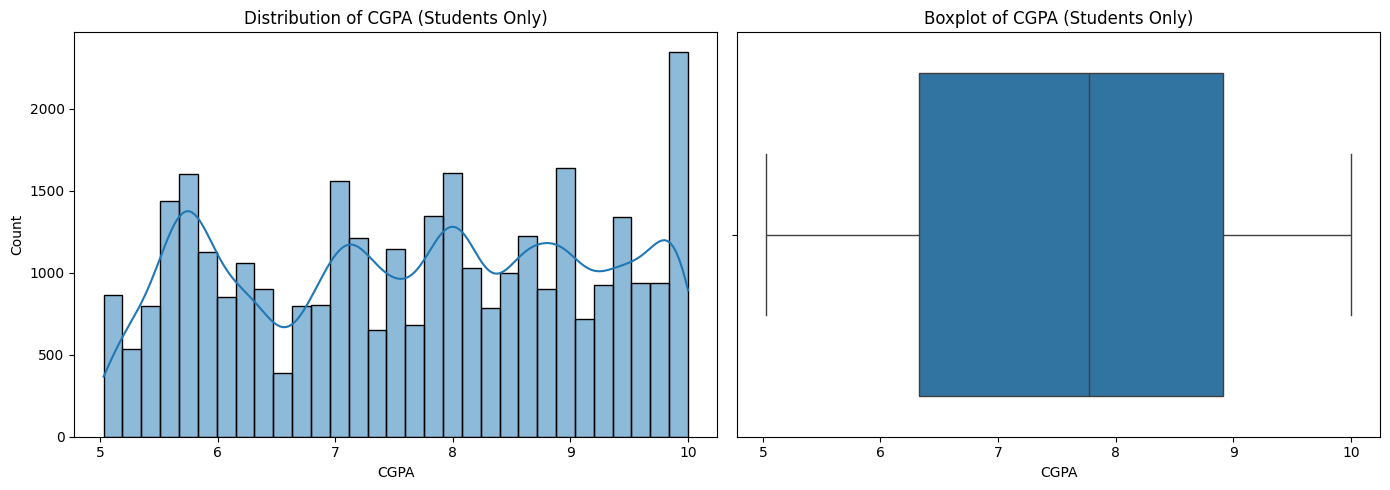

In [12]:
students = cleaned_data[cleaned_data['Working Professional or Student'] == 'Student']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE
sns.histplot(students['CGPA'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of CGPA (Students Only)")
axes[0].set_xlabel("CGPA")

# Boxplot
sns.boxplot(x=students['CGPA'], ax=axes[1])
axes[1].set_title("Boxplot of CGPA (Students Only)")
axes[1].set_xlabel("CGPA")

plt.tight_layout()
plt.show()


Dựa vào số liệu thống kê và biểu đồ:

- Điểm trung bình là 7.66 -> Hầu hết học sinh có CGPA ở mức khá - tốt, phân bố tập trung quanh mức khá đến tốt

- Phân phối multimodal, nhiều đỉnh -> sự đa dạng về thang điểm của học sinh

- Điểm 10 chiếm số lượng nhiều nhất, cao vượt trội (có thể yếu tố dự đoán áp lực học tập do học nhiều. Hay là các bạn điểm kém hơn có thể thấy mình kém cỏi, áp lực khi so sánh với điểm 10 (vì số điểm 10 chiếm lượng lớn)

## Work/study hours (do là dữ liệu rời rạc nên histogram k phù hợp)

In [13]:
cleaned_data['Work/Study Hours'].describe()

count    166529.000000
mean          6.255481
std           3.838067
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Work/Study Hours, dtype: float64

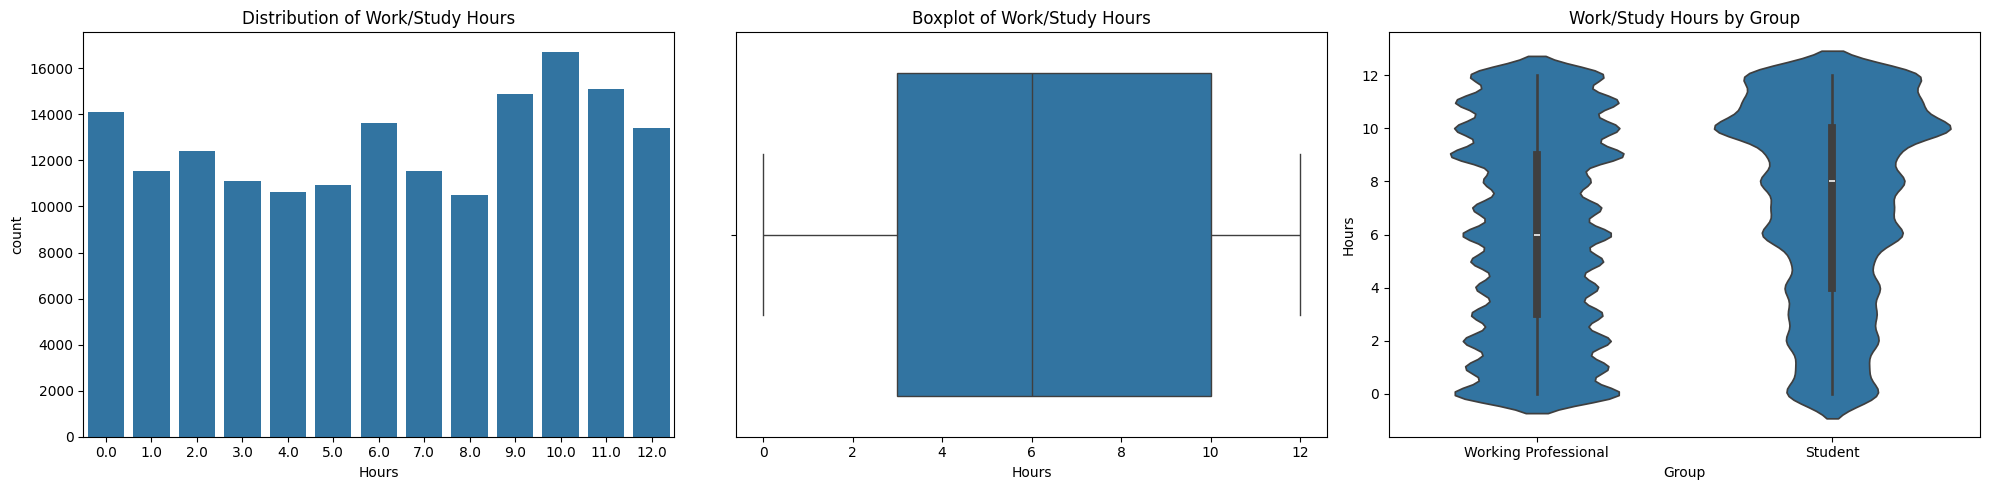

In [14]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Count plot 
sns.countplot(x=cleaned_data['Work/Study Hours'],  ax=axes[0])
axes[0].set_title("Distribution of Work/Study Hours")
axes[0].set_xlabel("Hours")

# Boxplot
sns.boxplot(x=cleaned_data['Work/Study Hours'], ax=axes[1])
axes[1].set_title("Boxplot of Work/Study Hours")
axes[1].set_xlabel("Hours")

# Violin plot theo nhóm
sns.violinplot(
    x='Working Professional or Student',
    y='Work/Study Hours',
    data=cleaned_data,
    ax=axes[2]
)
axes[2].set_title("Work/Study Hours by Group")
axes[2].set_xlabel("Group")
axes[2].set_ylabel("Hours")

plt.tight_layout()
plt.show()


- Độ phân tán dữ liệu cao, bị ảnh hưởng mạnh bởi sự khác biệt về độ tuổi, công việc, lối sống

- Trung bình dành 6 giờ để học/làm

- Các giá trị tập trung ở 2 đầu (0, 9, 10, 11, 12) thay vì các giá trị ở trung tâm -> học/làm nhiều or không học/làm

- Violin plot: 

+ Một lượng đáng kể người đi làm không dành thời gian làm/học, còn lại phân tán nhiều nhóm với thói quen học/làm khác nhau. Nhóm 0 giờ có thể thất nghiệp, nghỉ việc -> gây stress

+ Đa số Học sinh/SV dành khoảng 8-12 giờ học (cường độ cao), có nhóm nhỏ học rất ít (0-2 giờ) -> nguy cơ burn out ở học sinh, áp lực học lớn. Nhóm 0 giờ có thể bỏ học, mất động lực -> gây stress

+ Median của học sinh cao hơn so với người đi làm -> học sinh có xu hướng dành nhiều thời gian làm việc/học tập hơn

## 2.2. Binary variables

In [15]:
import math

In [16]:
for col in binary_cols:
    print('Value count:')
    print(cleaned_data[col].value_counts())
    print('-------------------------\n')

Value count:
Depression
0    136159
1     30370
Name: count, dtype: int64
-------------------------

Value count:
Have you ever had suicidal thoughts ?
0    84149
1    82380
Name: count, dtype: int64
-------------------------

Value count:
Family History of Mental Illness
0    83887
1    82642
Name: count, dtype: int64
-------------------------



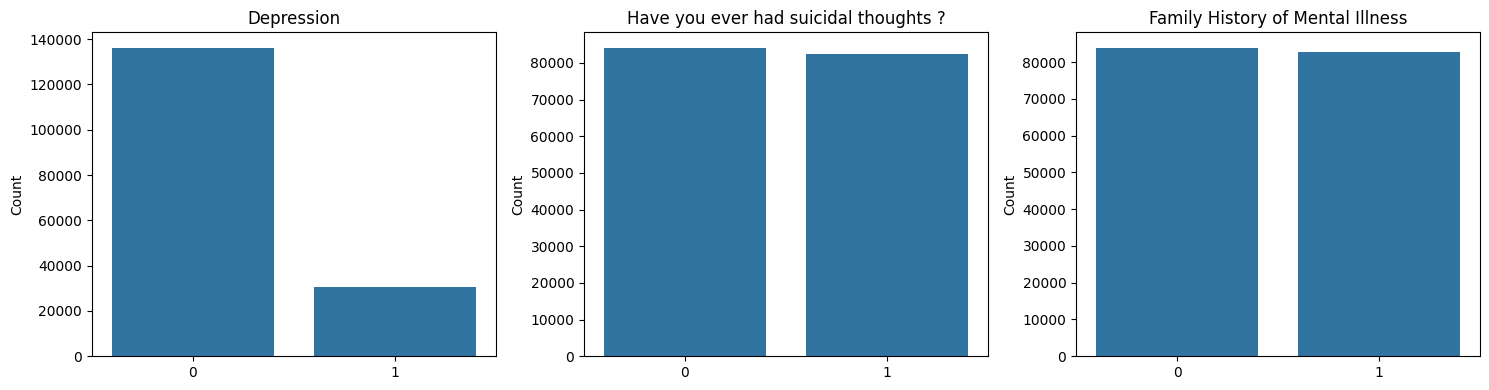

In [17]:
plt.figure(figsize=(15,4))  # 1 hàng, 3 cột

for i, col in enumerate(binary_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=cleaned_data[col])
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

- Một nhóm nhỏ khoảng 20% bị trầm cảm 

- Tỉ lệ giữa 2 nhóm về ý nghĩ tự tử gần như bằng nhau -> cần lưu ý để phân tích dự đoán depression (người có ý nghĩ tự tử thường liên quan tới trầm cảm)

- Tỉ lệ giữa 2 nhóm trong Family History of Mental Illness cũng gần như bằng nhau -> cũng  cần lưu ý để phân tích dự đoán depression (tương tự có mental illness gia đình cũng có thể ảnh hưởng đến Depression)

-> 2 biến sau quan trọng để dự báo 1 người có depression hay không

## 2.3. Ordinal variables

Lý do phải lọc Student/Working Professional:

- Biến Academic Pressure và Study Satisfaction chỉ có ý nghĩa cho Student, nhưng Working Professional chiếm lượng lớn trong dataset. Khi describe thì mean sẽ lệch sang hành vi của Working Professional (biased)

- Khi vẽ biểu đồ, pattern của Student sẽ khó nhìn hơn vì group Working chiếm áp đảo

In [18]:
academic_student = cleaned_data[cleaned_data['Working Professional or Student']=='Student']['Academic Pressure']
satisfaction_student = cleaned_data[cleaned_data['Working Professional or Student']=='Student']['Study Satisfaction']

work_profession = cleaned_data[cleaned_data['Working Professional or Student']=='Working Professional']['Work Pressure']
satisfaction_work = cleaned_data[cleaned_data['Working Professional or Student']=='Working Professional']['Job Satisfaction']


In [19]:
academic_student.describe()

count    33111.000000
mean         3.141192
std          1.378974
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Academic Pressure, dtype: float64

In [20]:
satisfaction_student.describe()

count    33111.000000
mean         2.941681
std          1.360335
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Study Satisfaction, dtype: float64

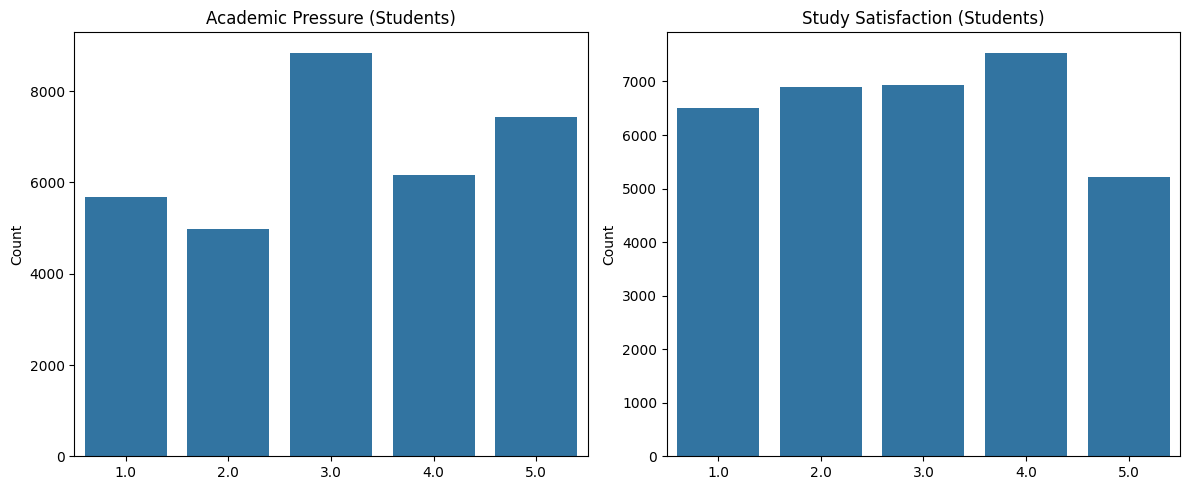

In [21]:
plt.figure(figsize=(12,5))  # 1 hàng, 2 cột

student_vars = {
    'Academic Pressure': academic_student,
    'Study Satisfaction': satisfaction_student
}

for i, (col_name, data_series) in enumerate(student_vars.items()):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=data_series)
    plt.title(f"{col_name} (Students)")
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Nhận xét

- Academic Pressure: Mức độ áp lực học tập của student ở mức trung bình đến cao,  số lượng Student rate 5.0 cao thứ 2 (hơn 7000). Áp lực không đồng đều giữa các student -> cần lưu ý cột 5.0, student đang chịu sự căng thẳng cao  (maybe ảnh hưởng Depression)

- Study Satisfaction: Mức độ hài lòng việc học không quá cao, trung bình (mean = 2.94). Nhóm 1.0 và 2.0 chiếm số lượng lớn

-> Student có áp lực học tập cao hơn mức hài lòng về việc học 1 chút -> khả năng liên quan đến depression

In [22]:
work_profession.describe()

count    133418.000000
mean          2.997856
std           1.402717
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work Pressure, dtype: float64

In [23]:
satisfaction_work.describe()

count    133418.000000
mean          2.974621
std           1.415602
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Job Satisfaction, dtype: float64

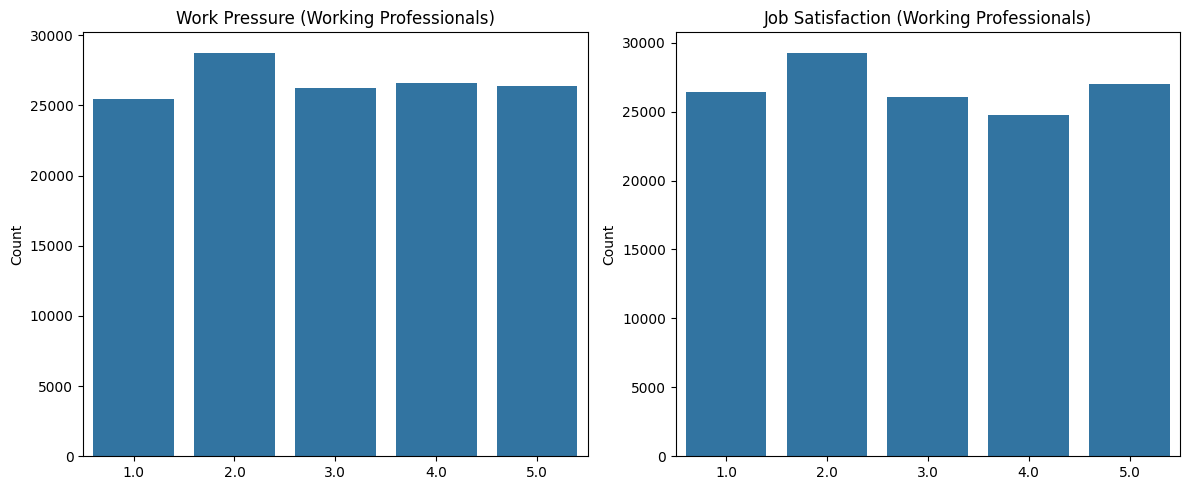

In [24]:
plt.figure(figsize=(12,5))  # 1 hàng, 2 cột

work_vars = {
    'Work Pressure': work_profession,
    'Job Satisfaction': satisfaction_work
}

for i, (col_name, data_series) in enumerate(work_vars.items()):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=data_series)
    plt.title(f"{col_name} (Working Professionals)")
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Nhận xét:

- Cả 2 đều dạng phân phối đều

- Work Presure: của người đi làm ở mức trung bình, phân phối khá đều, đa dạng các mức độ, không bị lệch hẳn về quá áp lực hay không áp lực

- Job Satisfaction: phân phối cũng khá đều, mức hài longf ở mức trung bình nhưng cao hơn chút ở 2 và 5 (phân hóa nhẹ). Một nhóm khá lớn cảm thấy không hài lòng (mức 2) khi đi làm -> có khả năng liên quan Depression

### 

-> Kết hợp pressure và satisfaction để kiểm tra có liên qunan tới depression (nếu pressure mà satisfaction thấp có thể là nguy cơ trầm cảm)

In [25]:
cleaned_data['Financial Stress'].describe()

count    166529.000000
mean          2.988410
std           1.411203
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Financial Stress, dtype: float64

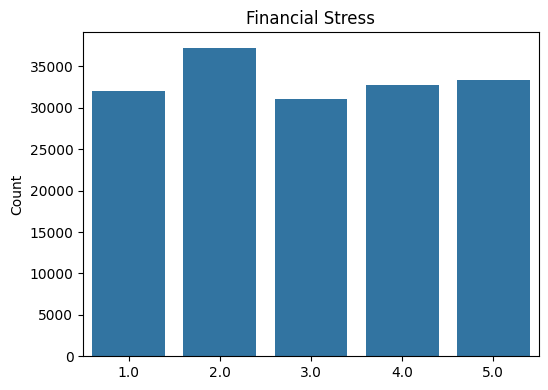

In [26]:
remaining_ordinal_cols = ['Financial Stress']
plt.figure(figsize=(15,4)) 

for i, col in enumerate(remaining_ordinal_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=cleaned_data[col])
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Nhận xét:

- Mức stress về tài chính trung bình, mọi người đều có áp lực tài chính, trung bình mức vừa phải

- Dữ liệu phân tán rộng, người tham gia khảo sát đa dạng, khác biệt (1 số thì rất ít stresss, 1 số thì nhiều stress)

- Nhóm rating 5.0 chiếm tỷ trọng cao số 2 -> khả năng ảnh hưởng Depression

-> Đây là feature quan trọng cho bài toán dự báo Depression (vì áp lực tài chính có thể gây stress mạnh hơn áp lực đi làm/học tập)     

-> có thể xét Financial stress với study/job satisfaction

## 2.4. Categorical variables

In [27]:
for col in categorical_cols:
    print('Value Count: ')
    print(cleaned_data[col].value_counts())
    print('------------\n')

Value Count: 
Gender
Male      91354
Female    74595
Other       580
Name: count, dtype: int64
------------

Value Count: 
City
Kalyan           7885
Patna            6994
Vasai-Virar      6785
Kolkata          6698
Ahmedabad        6682
Meerut           6581
Rajkot           6203
Ludhiana         6184
Visakhapatnam    6173
Pune             6158
Srinagar         5970
Mumbai           5853
Indore           5744
Agra             5534
Surat            5522
Varanasi         5430
Vadodara         5413
Hyderabad        5303
Kanpur           5209
Jaipur           5145
Thane            5079
Lucknow          5044
Nagpur           4939
Bangalore        4893
Chennai          4774
Ghaziabad        4304
Delhi            4254
Bhopal           4158
Faridabad        3893
Nashik           3725
Name: count, dtype: int64
------------

Value Count: 
Working Professional or Student
Working Professional    133418
Student                  33111
Name: count, dtype: int64
------------

Value Count: 
Profession

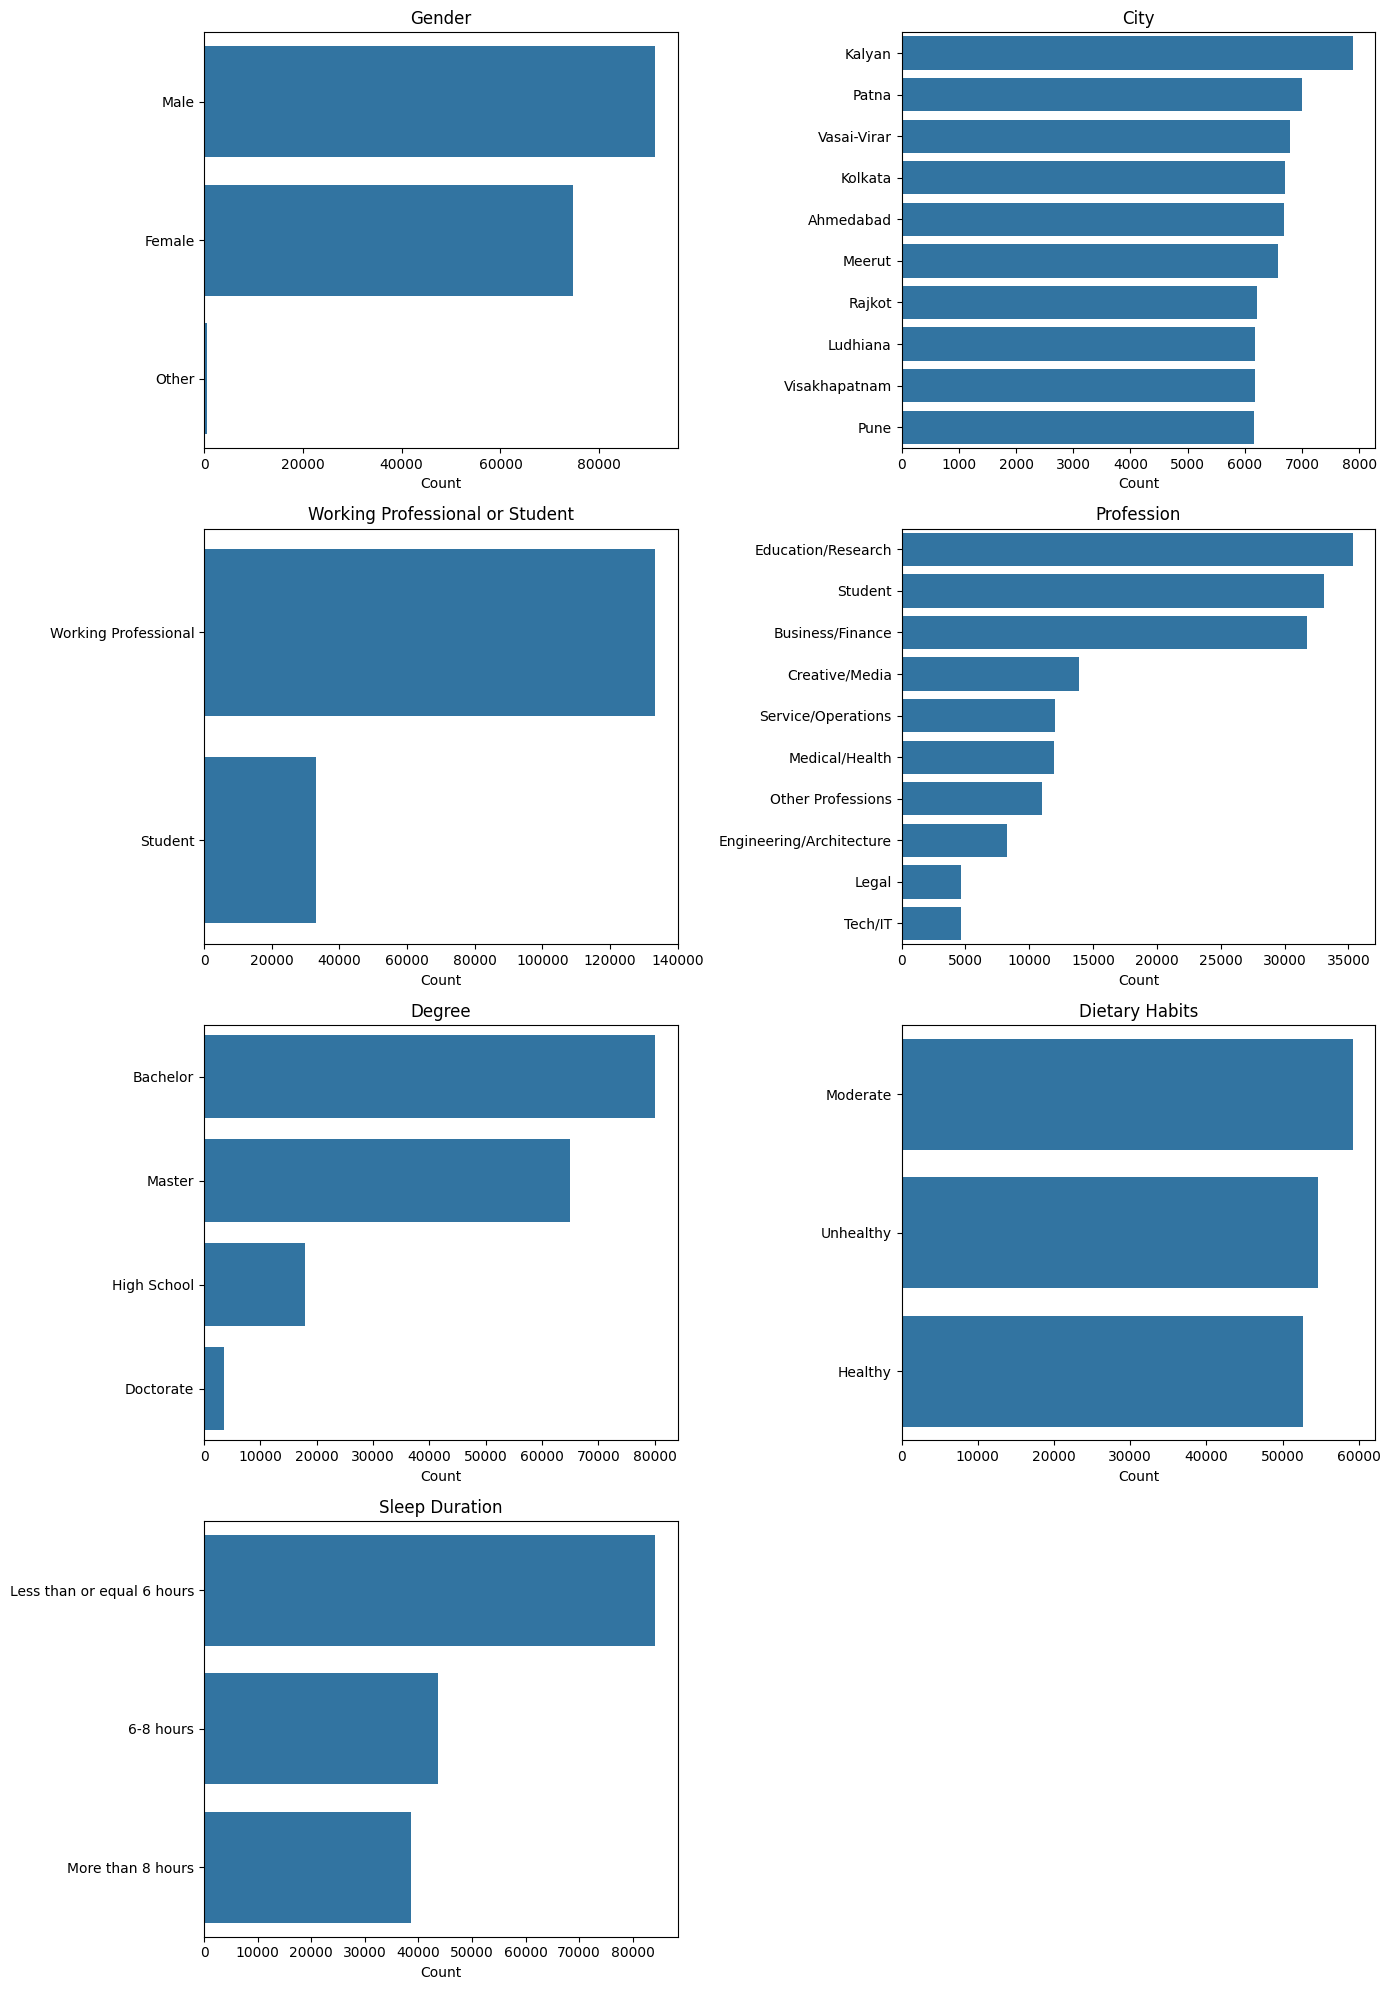

In [28]:
plt.figure(figsize=(14, 20))  

n_cols = 2
n_rows = (len(categorical_cols) + 1) // 2  

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    counts = cleaned_data[col].value_counts().head(10)  # top 10 nếu nhiều category
    sns.barplot(x=counts.values, y=counts.index)
    plt.title(f"{col}")
    plt.xlabel("Count")
    plt.ylabel("")

plt.tight_layout()
plt.show()

### Nhân khẩu học và Địa lý

- Gender: phân bố khá cân bằng giữa Male và Female, Other chiếm tỉ lệ rất nhỏ  

+ Male: áp lực trụ cột tài chính, áp lực xã hội, ít chia sẻ ....

+ Female: dễ tâm lý, thay đổi nội tiết tố, áp lực xã hội, khả năng tìm kiếm sự giúp đỡ cao hơn

- City: Có nhiều giá trị duy nhất, phân phối khá đều ở các thành phố top. Thành phố phản ánh môi trường sống(thành phố lớn có thể gây stress cao hơn =)))) )

### Công việc và Học vấn 

- Working professional or student: người đi làm chiếm 80.12% trong dataset

- Profession: đa dạng, Ngành nghề education chiếm tỉ trọng cao nhất, sau đó là Student và Business/Finance. Tech/IT và Legal chiếm tỉ trọng thấp 

+ Education/Research: Áp lực nghiên cứu, hay áp lực giảng dạy, lương thấp.... áp lực học sinh phụ huynh

+ Business/Finance: áp lực làm việc, môi trường cạnh tranh cao 

-> Ngành nghề có tính chất công việc, đặc thù stress riêng (Khi feature engi có thể bỏ working or student đi do trong profession có về student r maybe)

- Degree: 

+ Dữ liệu phản ánh đúng thực tế, tỷ lệ bằng cử nhân thường chiếm nhiều hơn so với các degee khác.  Ngoài ra Master cũng có số lượng nhiều trong dataset -> Dataset tập trung vào nhóm lao động tri thức, chuyên môn cao, môi trường học thuật -> Những nhóm này thường có áp lực không đủ giỏi, áp lực thăng tiến, không như kỳ vọng của xã hội... hay công việc nhiều, căng thẳng dẫn đến burnout

+ Nhóm High School: Là student thì áp lực học tập, là người đi làm thì tự ti, áp lực với những người có bằng cấp cao

+ Doctorate: dù số lượng ít nhưng dễ trầm cảm vì áp lực nghiên cứu.....

### Lối sống

- Dietary Habits: 

+ Phân phối khá cân bằng, tốt cho model không imbalance. 

+ Feature quan trọng vì có thể nhóm Unhealthy(cao số 2) có tỷ lệ trầm cảm cao hơn, do bận rộn nên ăn uống qua loa, đồ ăn nhiều đường hay chất béo xấu -> có thể gây ảnh hưởng đến tâm trạng. Hay khi stresss, con người có xu hướng tìm đến đồ ngọt, đồ ăn nhanh, dầu mỡ để giải tỏa)

- Sleep Duration: Nhóm <=6 hours chiếm tỉ lệ lớn nhất (khoảng 50% dữ liệu), phản ánh tính chất nhóm đối tượng: Học vấn cao, Áp lực lớn, Thời gian học/làm dài, cho thấy tình trạng thiếu ngủ phổ biến, có thể ảnh hưởng đến Depression (mất ngủ or ngủ quá ít có thể là triệu chứng Depression)

### => Dựa vào các biến cho ta thấy bộ dữ liệu vẽ nên bức tranh xã hội hiện đại: Giỏi, bận rộn nhưng áp lực lớn, thiếu ngủ, ăn uống k lành mạnh, lối sống không tốt

In [29]:
cleaned_data['Gender'] = cleaned_data['Gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
})

cleaned_data['Working Professional or Student'] = cleaned_data['Working Professional or Student'].map({
    'Working Professional': 0,
    'Student': 1
})

cleaned_data['Degree'] = cleaned_data['Degree'].map({
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'Doctorate': 3
})

cleaned_data['Dietary Habits'] = cleaned_data['Dietary Habits'].map({
    'Healthy': 0,
    'Moderate': 1,
    'Unhealthy': 2
})

cleaned_data['Sleep Duration'] = cleaned_data['Sleep Duration'].map({
    'Less than or equal 6 hours': 0,
    '6-8 hours': 1,
    'More than 8 hours': 2
})


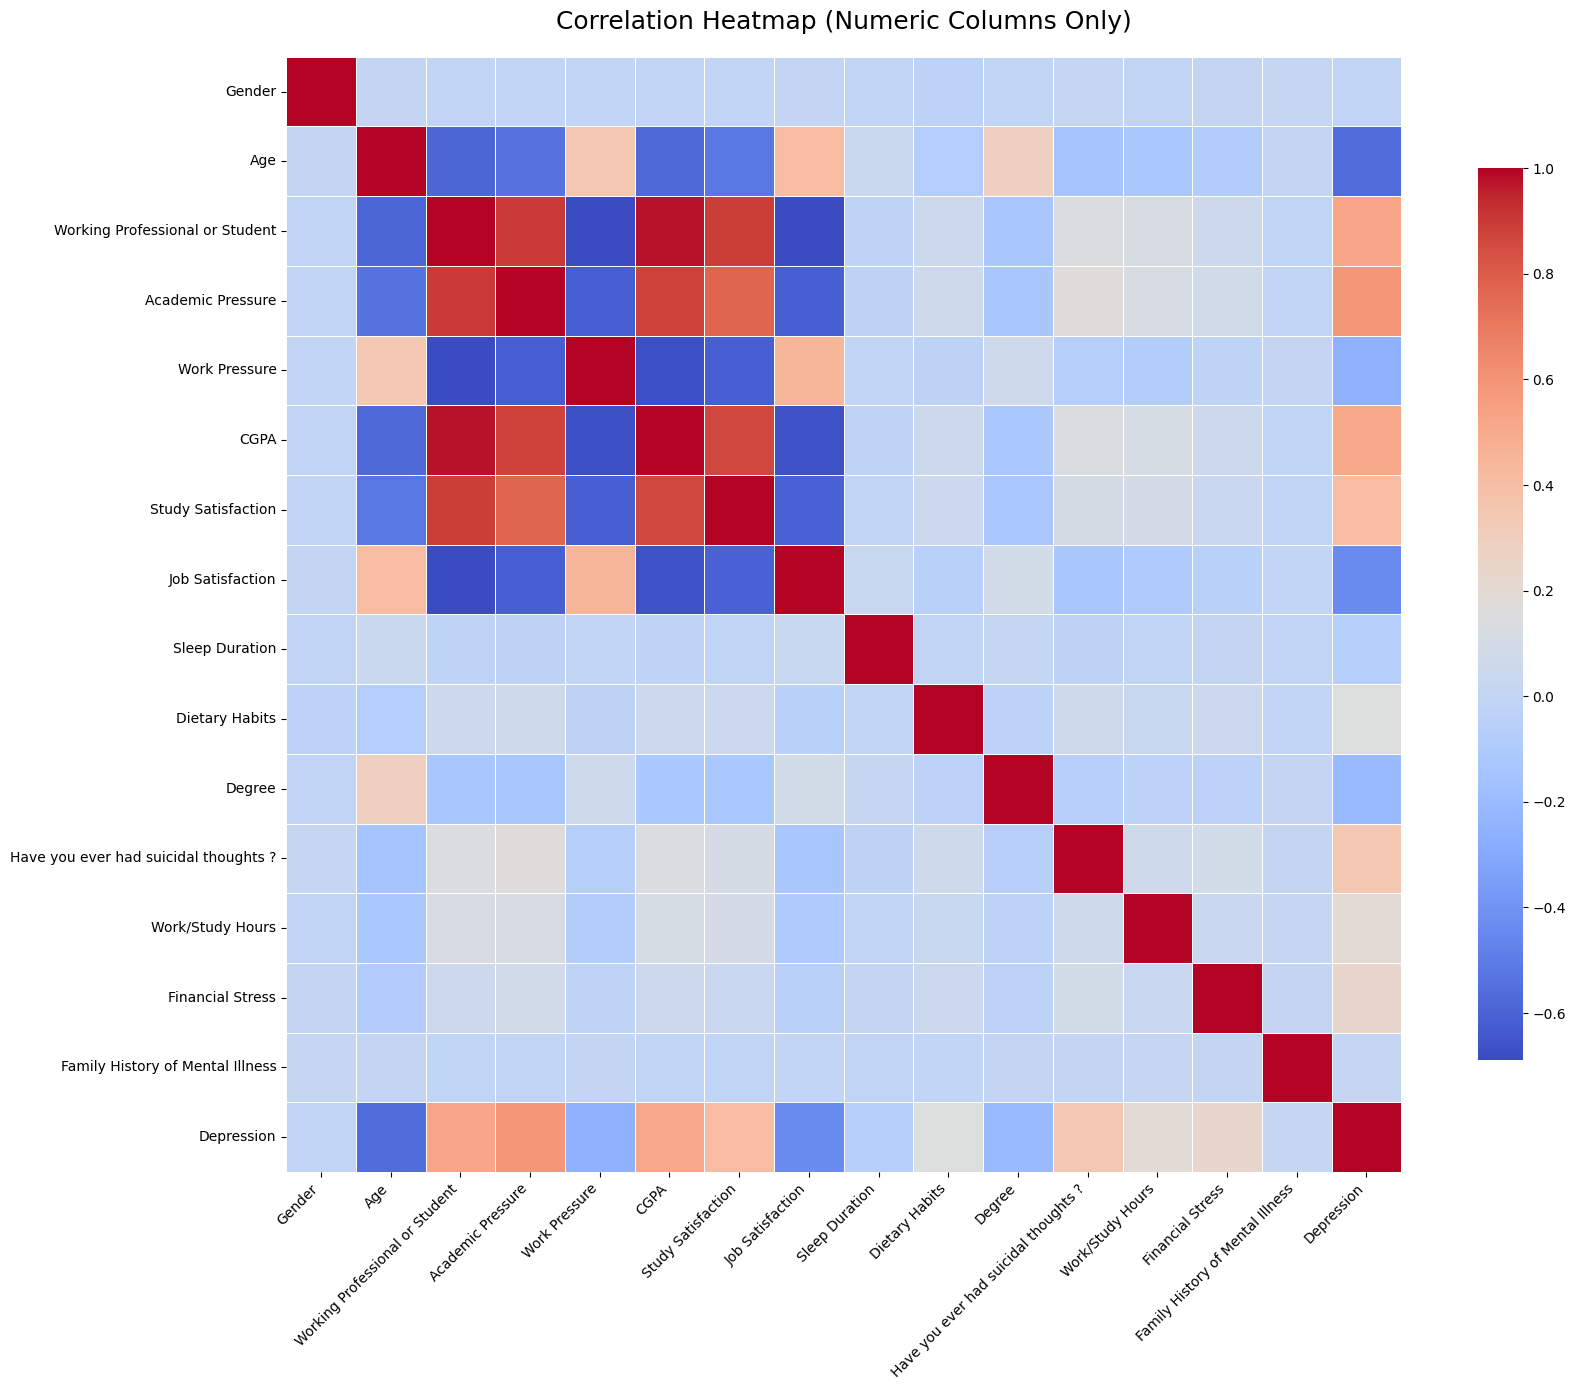

In [55]:
numeric_df = cleaned_data.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(18, 14))

sns.heatmap(
    corr,
    cmap="coolwarm",          # màu dịu, đẹp, chuyên nghiệp
    linewidths=0.4,
    linecolor='white',
    annot=False,
    square=True,             # ô trở thành hình vuông, nhìn sạch hơn
    cbar_kws={"shrink": 0.8} # colorbar gọn lại, không chiếm diện tích
)

plt.title("Correlation Heatmap (Numeric Columns Only)", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

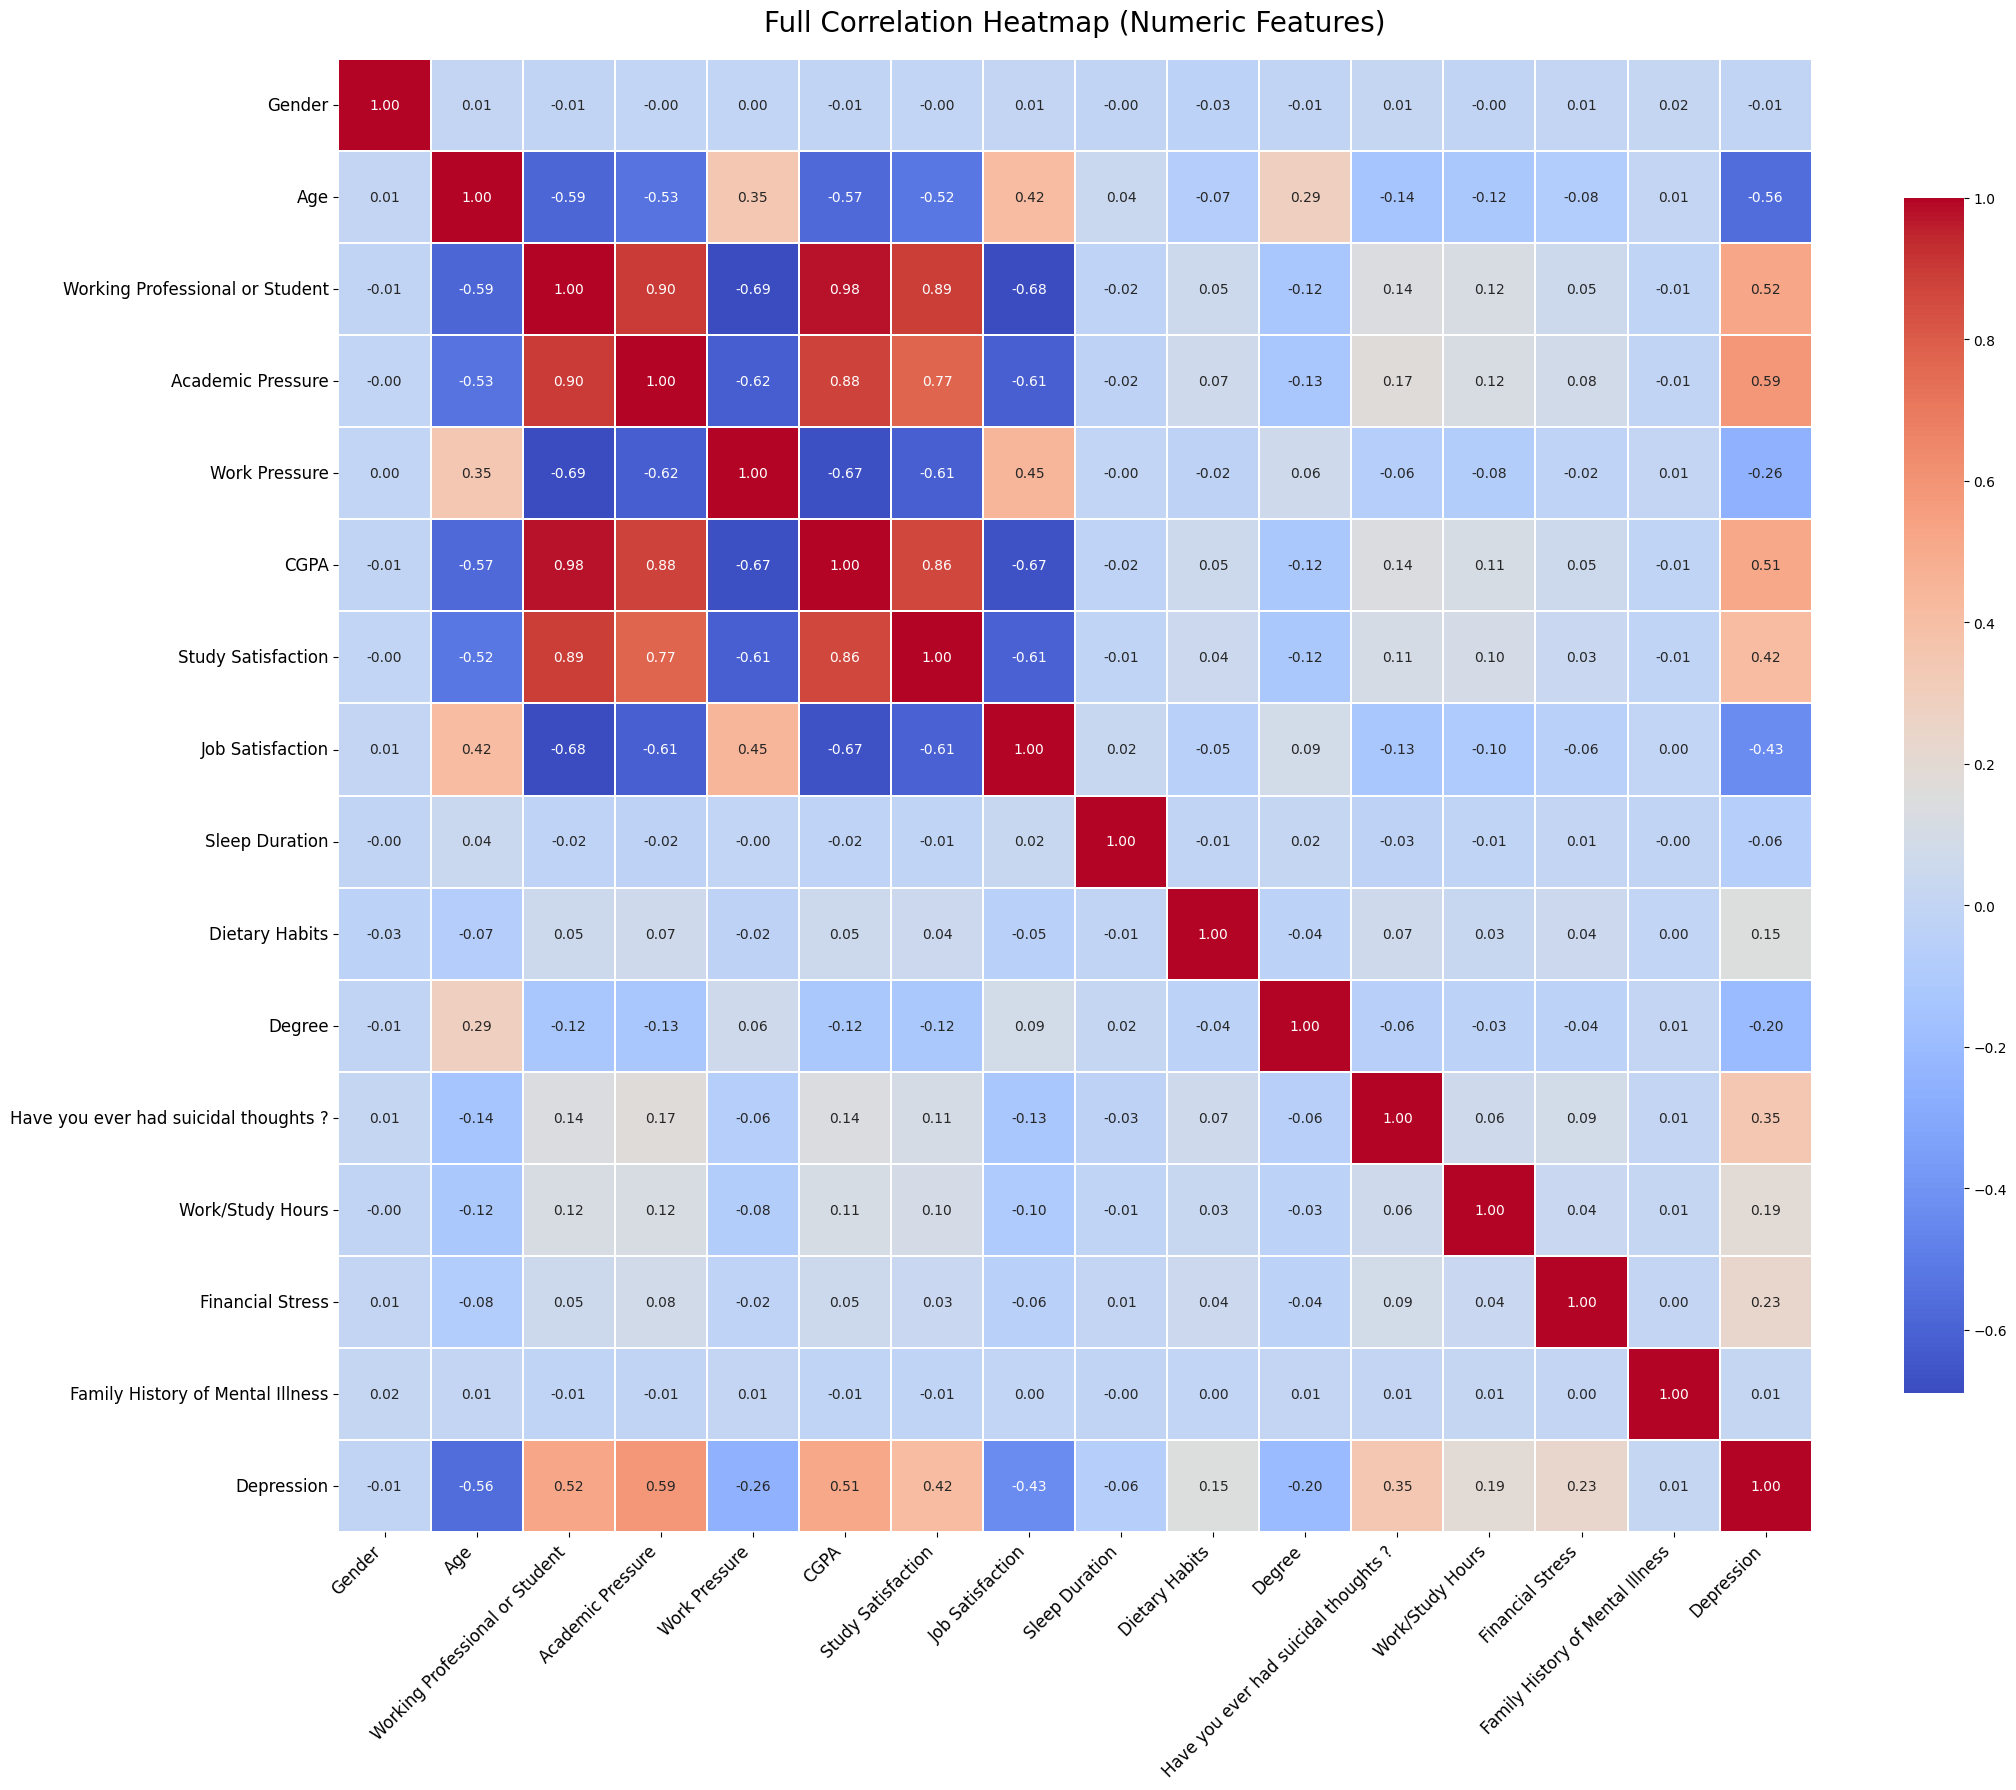

In [64]:
numeric_df = cleaned_data.select_dtypes(include='number')

corr = numeric_df.corr()

plt.figure(figsize=(22, 18))

sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,              # hiện số trong ô
    fmt=".2f",
    square=True,             # ô vuông cho đẹp
    linewidths=0.3,
    linecolor='white',
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title("Full Correlation Heatmap (Numeric Features)", fontsize=20, pad=20)
plt.tight_layout()
plt.show()

# 3. Variable Classification

# A. NUMERICAL FEATURES

## 1. PHƯƠNG PHÁP THỐNG KÊ

### 1.1. Point-Biserial Correlation

Mục đích

Định lượng mức độ và hướng tuyến tính giữa:

- Biến số học (continuous)

- Biến nhị phân Depression (0/1)

Point-biserial = Pearson khi một biến nhị phân.

In [31]:
from scipy.stats import pointbiserialr

numerical_features = [
    "Age",
    "CGPA",
    "Work/Study Hours"
]

results_corr = []

for col in numerical_features:
    r, p = pointbiserialr(cleaned_data[col], cleaned_data["Depression"])
    results_corr.append([col, r, p])

corr_df = pd.DataFrame(results_corr, columns=["Feature", "Point-Biserial r", "p-value"])
corr_df.sort_values(by="Point-Biserial r", key=abs, ascending=False)

,Feature,Point-Biserial r,p-value
0,Age,-0.563473,0.0
1,CGPA,0.511536,0.0
2,Work/Study Hours,0.189813,0.0


Nhận xét:

Tất cả 3 biến Feature đều có mối tương quan có ý nghĩa thống kê với biến nhị phân mục tiêu (p-value=0)

Dấu tương quan:

- Dương (+): Giá trị Feature tăng -> Biến mục tiêu có xu hướng thuộc nhóm được mã hóa 1.

- Âm (-): Giá trị Feature tăng -> Biến mục tiêu có xu hướng thuộc nhóm được mã hóa 0.

Sức mạnh tương quan (Giá trị tuyệt đối |r|):

- Cao: Age (-0.566), CGPA (0.511).

- Thấp: Work/Study Hours (0.190).

### 1.2. Kiểm định Mann–Whitney U (Phi tham số)

Mục đích

Kiểm tra sự khác biệt trung vị giữa hai nhóm Depression:

- 0: không trầm cảm

- 1: có trầm cảm

→ Dùng khi dữ liệu không chuẩn hoặc nhiều outlier.

In [32]:
from scipy.stats import mannwhitneyu

results_mw = []

for col in numerical_features:
    group0 = cleaned_data[cleaned_data["Depression"] == 0][col]
    group1 = cleaned_data[cleaned_data["Depression"] == 1][col]
    
    stat, p = mannwhitneyu(group0, group1, alternative="two-sided")
    results_mw.append([col, stat, p])

mw_df = pd.DataFrame(results_mw, columns=["Feature", "Mann–Whitney U statistic", "p-value"])
mw_df

,Feature,Mann–Whitney U statistic,p-value
0,Age,3.736298e+09,0.0
1,CGPA,9.521536e+08,0.0
2,Work/Study Hours,1.480347e+09,0.0


## 2. PHƯƠNG PHÁP TRỰC QUAN (VISUALIZATION)

### 2.1. Boxplot & Violin Plot

Mục đích

- So sánh phân phối và trung vị

- Nhận dạng outliers

- Xem sự khác biệt rõ ràng giữa hai nhóm Depression

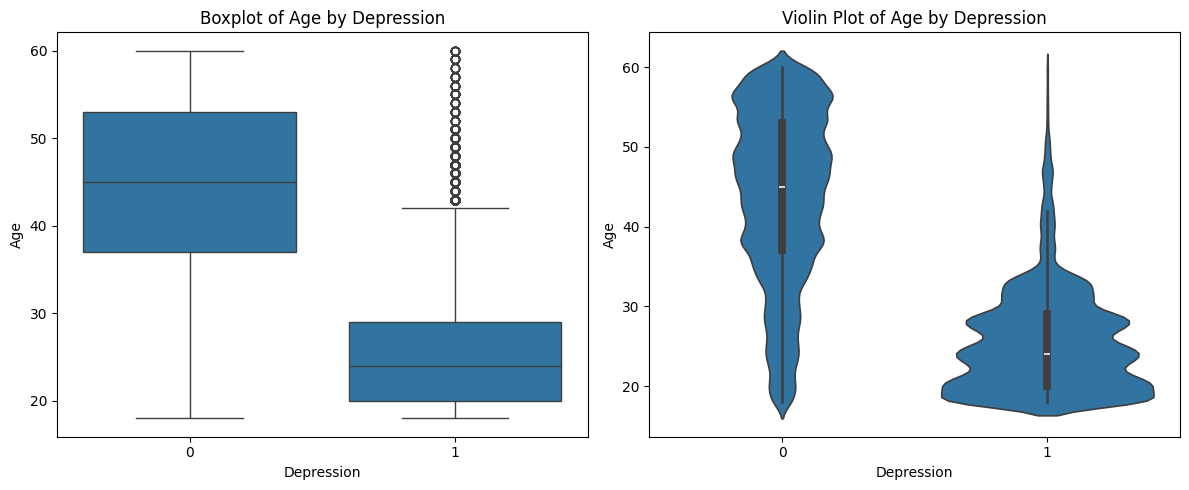

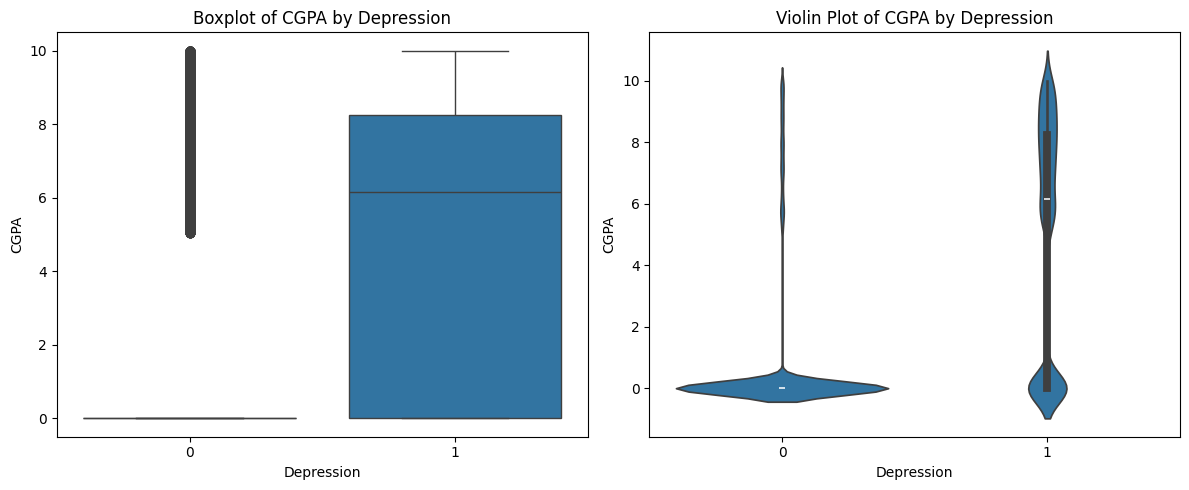

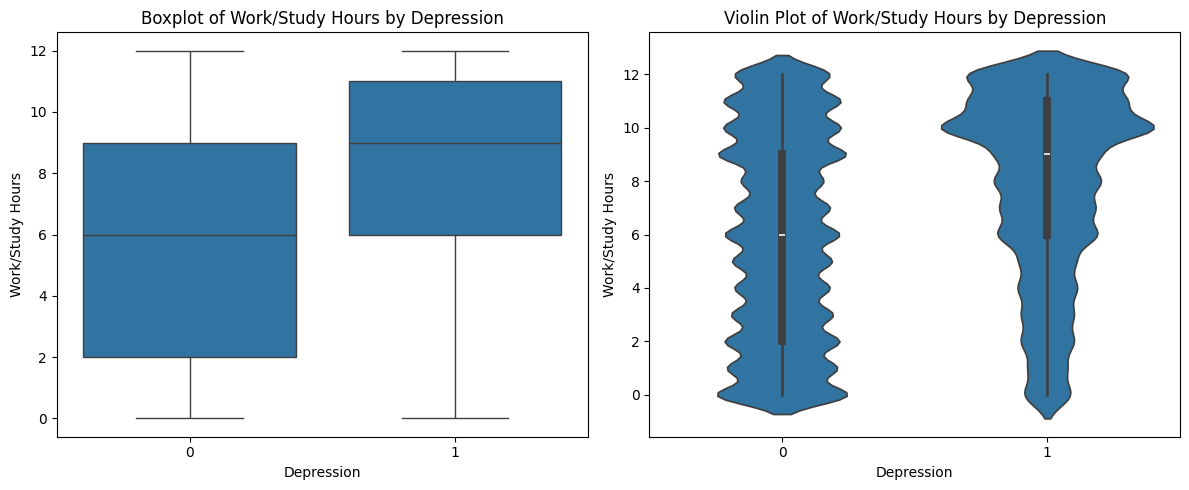

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_features:
    plt.figure(figsize=(12,5))
    
    # Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(data=cleaned_data, x="Depression", y=col)
    plt.title(f"Boxplot of {col} by Depression")
    
    # Violin
    plt.subplot(1,2,2)
    sns.violinplot(data=cleaned_data, x="Depression", y=col)
    plt.title(f"Violin Plot of {col} by Depression")
    
    plt.tight_layout()
    plt.show()


### 2.2. KDE Plot / Histogram

Mục đích

- So sánh mật độ phân phối giữa Depression = 0 và 1

- Nếu hai đường tách xa → biến có mức ảnh hưởng cao

/tmp/ipykernel_181/965444214.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 0][col], label="Depression = 0", shade=True)
/tmp/ipykernel_181/965444214.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 1][col], label="Depression = 1", shade=True)


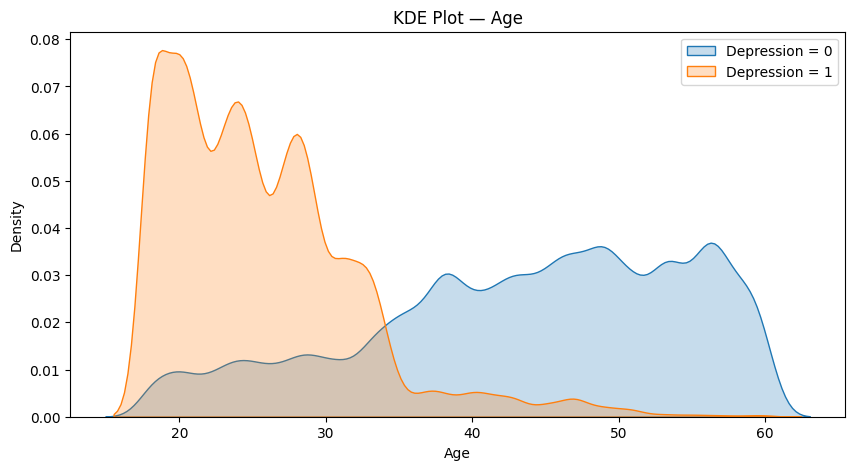

/tmp/ipykernel_181/965444214.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 0][col], label="Depression = 0", shade=True)
/tmp/ipykernel_181/965444214.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 1][col], label="Depression = 1", shade=True)


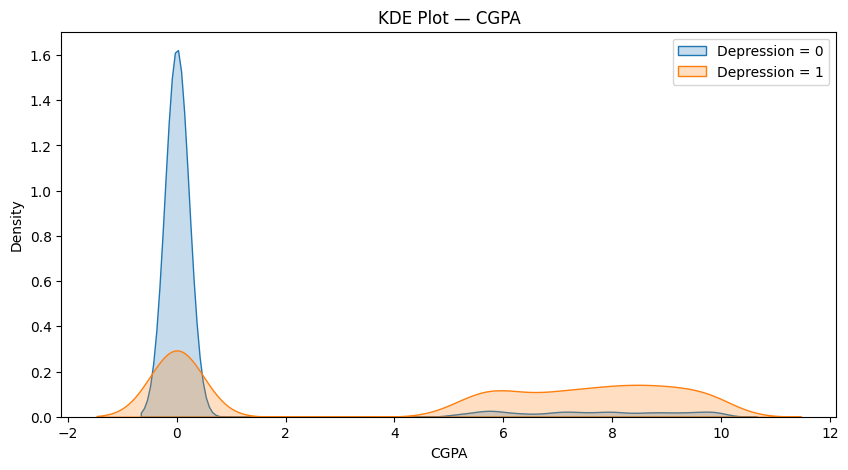

/tmp/ipykernel_181/965444214.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 0][col], label="Depression = 0", shade=True)
/tmp/ipykernel_181/965444214.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 1][col], label="Depression = 1", shade=True)


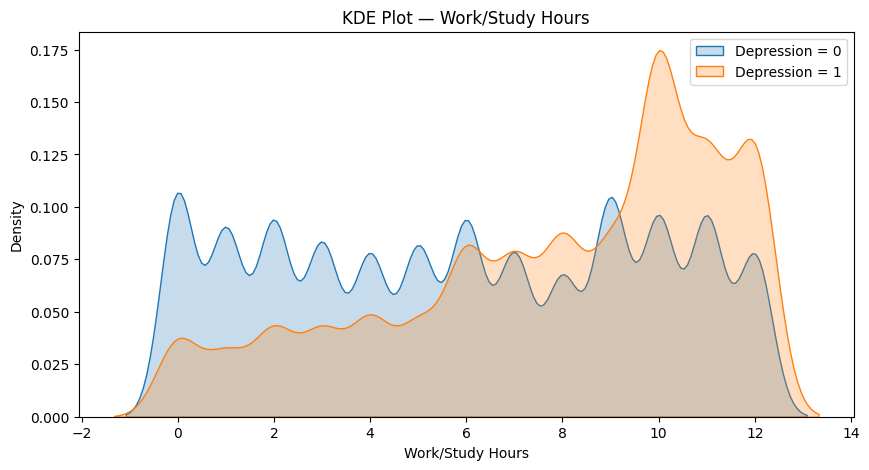

In [34]:
for col in numerical_features:
    plt.figure(figsize=(10,5))
    
    sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 0][col], label="Depression = 0", shade=True)
    sns.kdeplot(cleaned_data[cleaned_data["Depression"] == 1][col], label="Depression = 1", shade=True)
    
    plt.title(f"KDE Plot — {col}")
    plt.legend()
    plt.show()

# B. BINARY CATEGORICAL FEATURES

In [35]:
binary_features = ["Working Professional or Student", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

## 1. Statistical Methods

### 1.1. Tính tỷ lệ mắc bệnh theo từng nhóm (P(D=1 | Category))

In [36]:
results_rate = []

for col in binary_features:
    rate = cleaned_data.groupby(col)["Depression"].mean()
    count = cleaned_data[col].value_counts()
    
    for level in rate.index:
        results_rate.append([
            col,
            level,
            count[level],
            rate[level]
        ])

rate_df = pd.DataFrame(results_rate,
    columns=["Feature", "Category", "Count", "Depression Rate"]
)
rate_df

,Feature,Category,Count,Depression Rate
0,Working Professional or Student,0,133418,0.082260
1,Working Professional or Student,1,33111,0.585757
2,Have you ever had suicidal thoughts ?,0,84149,0.048474
3,Have you ever had suicidal thoughts ?,1,82380,0.319143
4,Family History of Mental Illness,0,83887,0.176881
5,Family History of Mental Illness,1,82642,0.187943


### 1.2. Chi-square Test (2×2)

In [37]:
from scipy.stats import chi2_contingency

chi2_results = []

for col in binary_features:
    table = pd.crosstab(cleaned_data[col], cleaned_data["Depression"])
    chi2, p, dof, expected = chi2_contingency(table)

    chi2_results.append([col, chi2, p])

chi2_df = pd.DataFrame(chi2_results, columns=["Feature", "Chi-square", "p-value"])
chi2_df

,Feature,Chi-square,p-value
0,Working Professional or Student,45096.854677,0.000000e+00
1,Have you ever had suicidal thoughts ?,20450.758825,0.000000e+00
2,Family History of Mental Illness,34.091588,5.257808e-09


### 1.3. Odds Ratio (OR)

In [38]:
or_results = []
epsilon = 1e-9 # Sử dụng để tránh lỗi chia cho 0

for col in binary_features:
    table = pd.crosstab(cleaned_data[col], cleaned_data["Depression"])
    
    # Kiểm tra số lượng cấp độ: chỉ tính cho biến có 2 cấp độ
    categories = table.index
    if len(categories) != 2:
        print(f"Bỏ qua '{col}': Biến này không phải nhị phân (có {len(categories)} cấp độ).")
        continue

    # Lấy nhãn của hai cấp độ (ví dụ: 0 và 1)
    cat_A = categories[0]
    cat_B = categories[1] 

    # Lấy giá trị a, b, c, d từ bảng (đã sửa để dùng nhãn động)
    #               Depression=0 (No) | Depression=1 (Yes)
    # Cat A (Base)  | a | b
    # Cat B (Test)  | c | d
    
    a = table.loc[cat_A, 0]
    b = table.loc[cat_A, 1]
    c = table.loc[cat_B, 0]
    d = table.loc[cat_B, 1]

    # Tính Odds Ratio (OR) chuẩn: Odds của Cat B so với Cat A (Baseline)
    # OR = (Odds D=1 Cat B) / (Odds D=1 Cat A) = (d/c) / (b/a) = (d * a) / (c * b)
    
    numerator = d * a
    denominator = c * b
    
    # Thêm epsilon vào mẫu số để tránh lỗi chia cho 0 (khi c hoặc b = 0)
    OR_standard = numerator / (denominator + epsilon) 
    
    or_results.append([col, OR_standard])

or_df = pd.DataFrame(or_results, columns=["Feature", "Odds Ratio (Cat 1 vs Cat 0)"])
or_df

,Feature,Odds Ratio (Cat 1 vs Cat 0)
0,Working Professional or Student,15.775813
1,Have you ever had suicidal thoughts ?,9.201222
2,Family History of Mental Illness,1.077016


(1) Odds ratio = 0.064 cho biến Working Professional or Student cho thấy nhóm “working professional” có khả năng bị depression thấp hơn rất nhiều (khoảng 94%) so với nhóm “student”
(2)Những người từng có ý nghĩ tự sát có nguy cơ mắc trầm cảm cao gấp hơn 9 lần, cho thấy đây là biến dự báo mạnh nhất và phản ánh trực tiếp mức độ tổn thương tâm lý.
(3) Tiền sử gia đình mắc bệnh tâm lý chỉ làm tăng nguy cơ khoảng 7%, gần như không đáng kể trong bộ dữ liệu này, có thể do thiếu thông tin chính xác hoặc mức độ báo cáo thấp.

## 2. Visualization Methods

### 2.1. Grouped Bar Chart — Target Rate

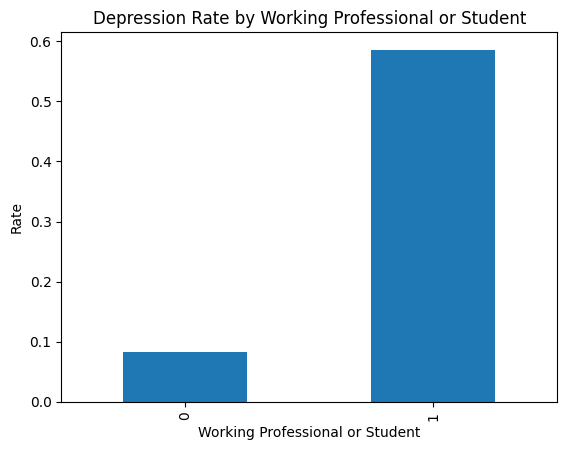

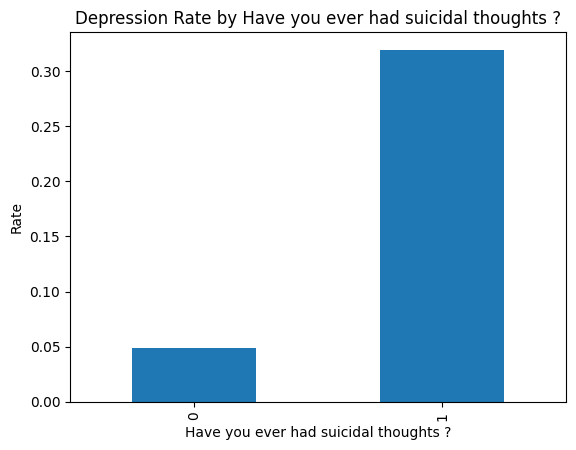

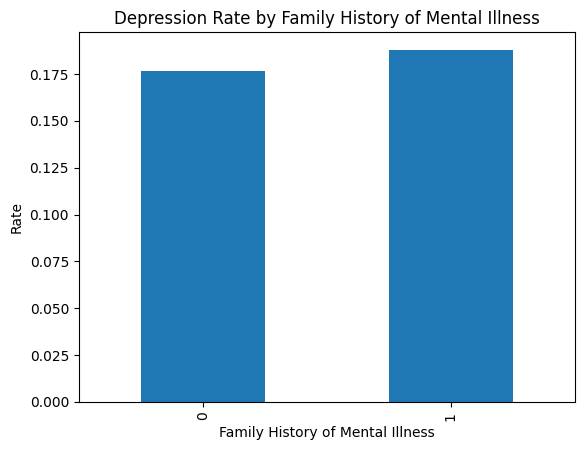

In [39]:
import matplotlib.pyplot as plt

for col in binary_features:
    rate = cleaned_data.groupby(col)["Depression"].mean()
    rate.plot(kind="bar")
    plt.title(f"Depression Rate by {col}")
    plt.ylabel("Rate")
    plt.show()

# C. ORDINAL CATEGORICAL FEATURES

In [40]:
ordinal_features = [
    "Academic Pressure",
    "Work Pressure",
    "Study Satisfaction",
    "Job Satisfaction",
    "Financial Stress",
    "Sleep Duration",
    "Dietary Habits",
]

## 1. Statistical Methods

### 1.1. Tỷ lệ mắc bệnh theo từng mức độ

In [41]:
results_rate_ord = []

for col in ordinal_features:
    rate = cleaned_data.groupby(col)["Depression"].mean()
    count = cleaned_data[col].value_counts().sort_index()
    
    for level in rate.index:
        results_rate_ord.append([
            col,
            level,
            count[level],
            rate[level]
        ])

rate_ord_df = pd.DataFrame(results_rate_ord,
    columns=["Feature", "Level", "Count", "Depression Rate"]
)
rate_ord_df

,Feature,Level,Count,Depression Rate
0,Academic Pressure,0.0,133418,0.082260
1,Academic Pressure,1.0,5683,0.194440
2,Academic Pressure,2.0,4988,0.377506
3,Academic Pressure,3.0,8847,0.600656
4,Academic Pressure,4.0,6157,0.761085
5,Academic Pressure,5.0,7436,0.861619
6,Work Pressure,0.0,33111,0.585757
7,Work Pressure,1.0,25426,0.022615
8,Work Pressure,2.0,28770,0.032464
9,Work Pressure,3.0,26238,0.055416


### 1.2. Chi-square Test (k × 2)

In [42]:
chi2_results_ord = []

for col in ordinal_features:
    table = pd.crosstab(cleaned_data[col], cleaned_data["Depression"])
    chi2, p, dof, expected = chi2_contingency(table)

    chi2_results_ord.append([col, chi2, p])

chi2_ord_df = pd.DataFrame(chi2_results_ord, columns=["Feature", "Chi-square", "p-value"])
chi2_ord_df

,Feature,Chi-square,p-value
0,Academic Pressure,57464.557191,0.000000e+00
1,Work Pressure,48770.327004,0.000000e+00
2,Study Satisfaction,46669.920577,0.000000e+00
3,Job Satisfaction,47427.025768,0.000000e+00
4,Financial Stress,9193.521175,0.000000e+00
5,Sleep Duration,704.548710,1.021390e-153
6,Dietary Habits,3875.607628,0.000000e+00


### 1.3. Logistic Trend Test (Correlation between ordinal & target)

In [43]:
from scipy.stats import spearmanr

spearman_results = []

for col in ordinal_features:
    r, p = spearmanr(cleaned_data[col], cleaned_data["Depression"])
    spearman_results.append([col, r, p])

spearman_df = pd.DataFrame(spearman_results, columns=["Feature", "Spearman ρ", "p-value"])
spearman_df

,Feature,Spearman ρ,p-value
0,Academic Pressure,0.549737,0.000000e+00
1,Work Pressure,-0.266682,0.000000e+00
2,Study Satisfaction,0.504298,0.000000e+00
3,Job Satisfaction,-0.441913,0.000000e+00
4,Financial Stress,0.227276,0.000000e+00
5,Sleep Duration,-0.063188,6.618021e-147
6,Dietary Habits,0.149769,0.000000e+00


## 2. Visualization Methods

### 2.1. Line Plot — Depression Rate by Level

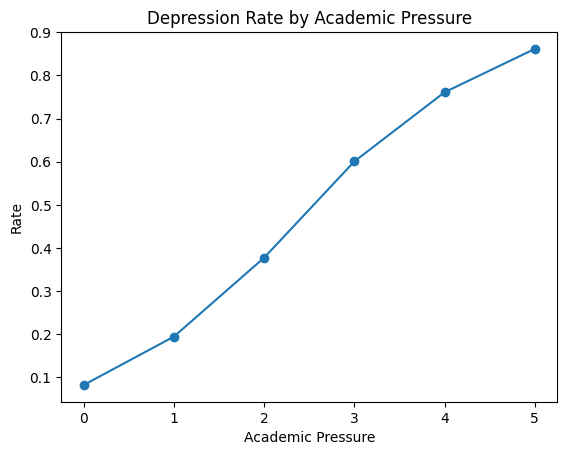

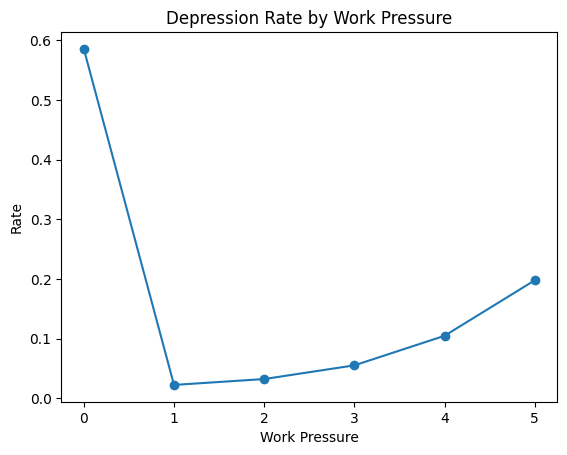

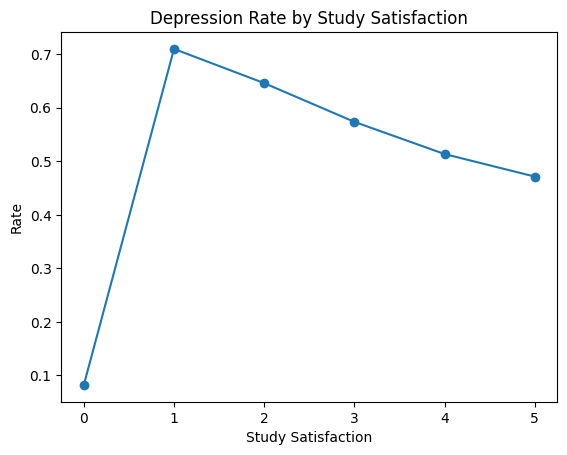

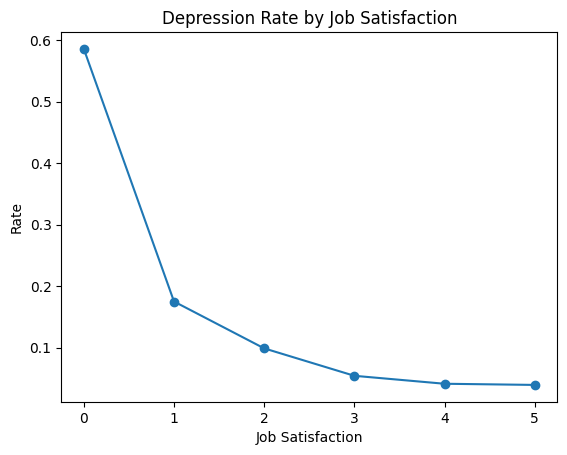

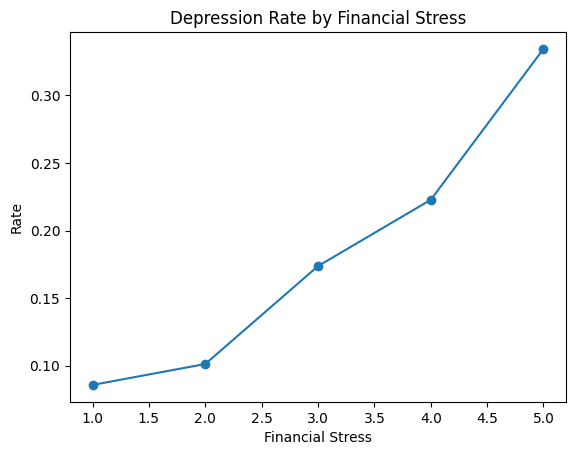

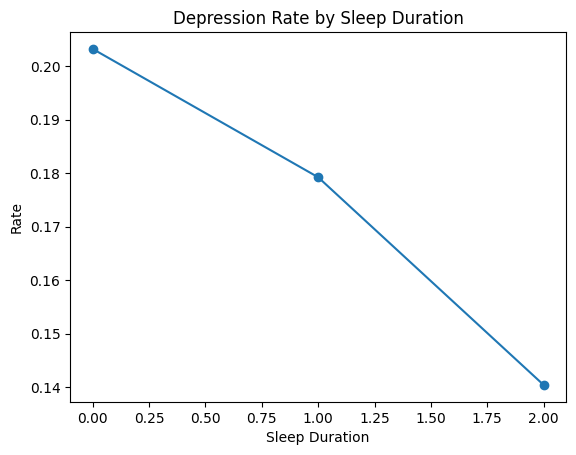

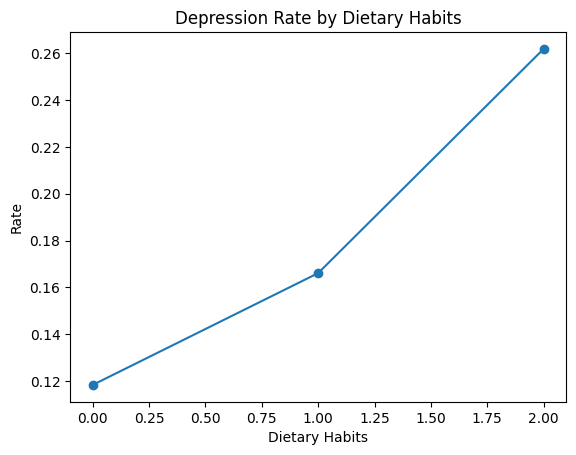

In [44]:
for col in ordinal_features:
    rate = cleaned_data.groupby(col)["Depression"].mean()
    rate.plot(marker="o")
    plt.title(f"Depression Rate by {col}")
    plt.ylabel("Rate")
    plt.show()

### 2.2. Stacked Bar Chart for Ordinal (không cần thiêts lắm)

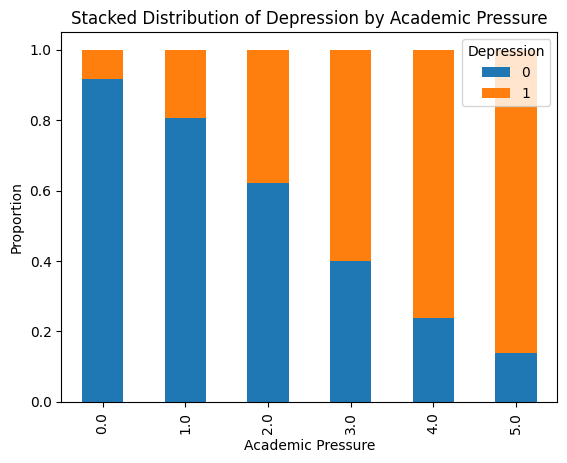

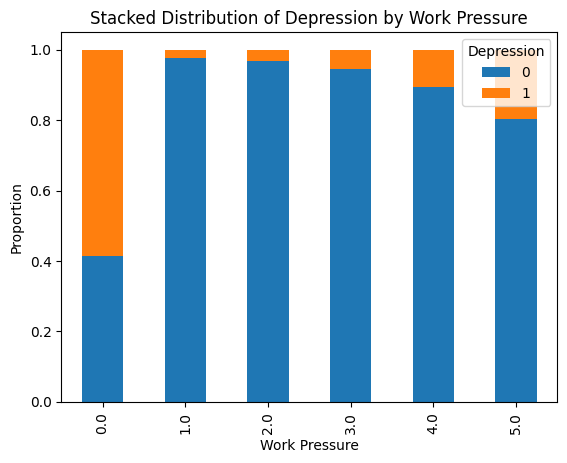

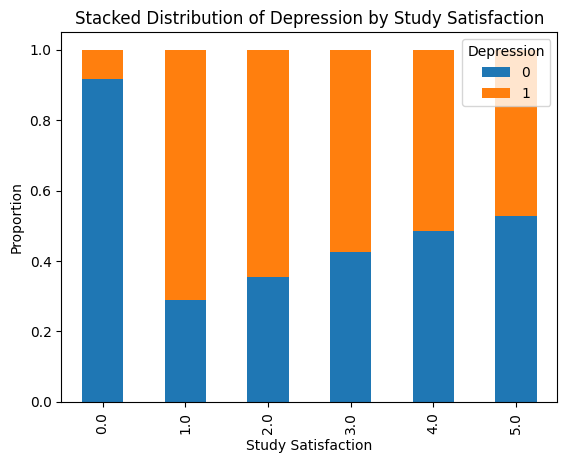

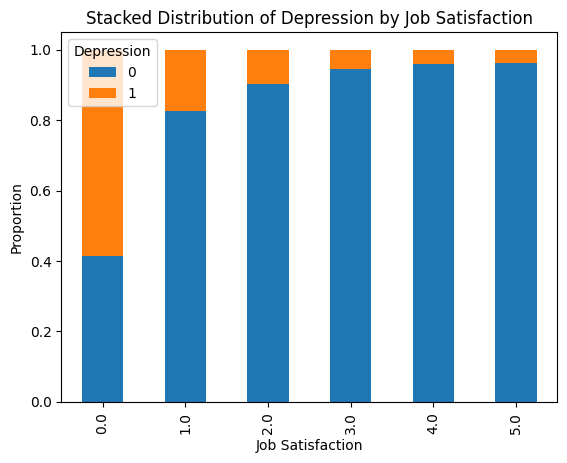

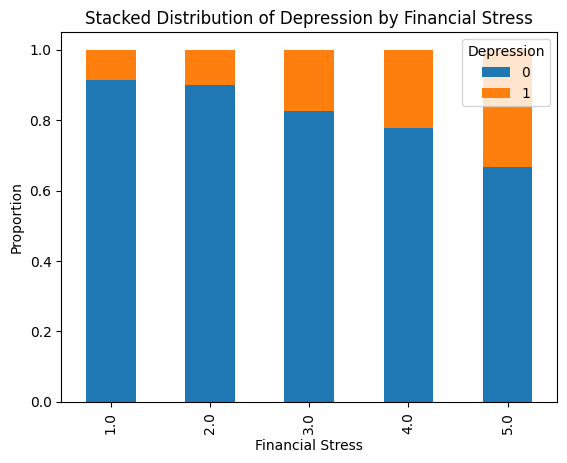

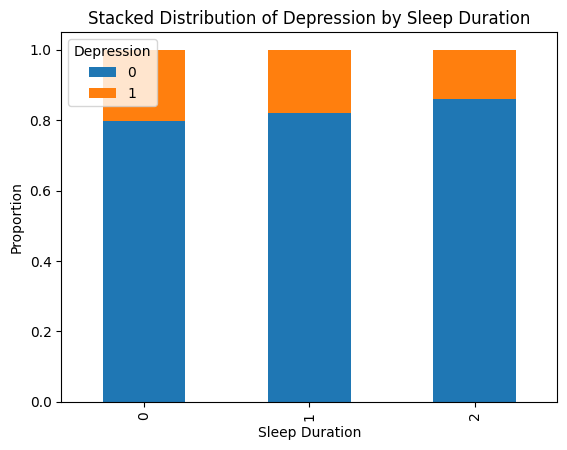

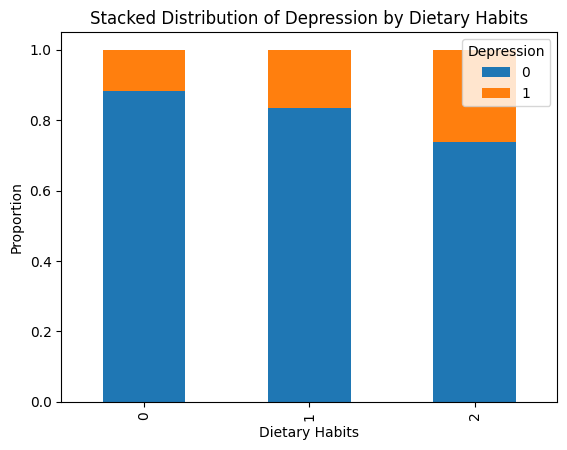

In [45]:
for col in ordinal_features:
    table = pd.crosstab(cleaned_data[col], cleaned_data["Depression"], normalize="index")
    table.plot(kind="bar", stacked=True)
    plt.title(f"Stacked Distribution of Depression by {col}")
    plt.ylabel("Proportion")
    plt.show()

# D. Nominal Categorical

In [46]:
nominal_categorical_features = [
    "City",
    "Profession",
    "Degree"
]

## 1. Statistical methods

In [47]:
target = "Depression"
chi_results = []
odds_ratio_results = []

for col in nominal_categorical_features:
    # ------------------------------
    # 1.1 Tính tỷ lệ mắc bệnh theo category
    # ------------------------------
    rate_df = cleaned_data.groupby(col)[target].mean().reset_index()
    rate_df.columns = [col, "Depression Rate"]
    print(f"\n\n=== Depression Rate by {col} ===")
    print(rate_df)

    # ------------------------------
    # 1.2 Chi-square Test
    # ------------------------------
    contingency = pd.crosstab(cleaned_data[col], cleaned_data[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results.append([col, chi2, p])

    # ------------------------------
    # 1.3 Odds Ratio cho từng category (vs baseline)
    # baseline = category đầu tiên
    # ------------------------------
    baseline = cleaned_data[col].unique()[0]
    for category in cleaned_data[col].unique():
        if category == baseline:
            continue

        a = len(cleaned_data[(cleaned_data[col] == category) & (cleaned_data[target] == 1)])
        b = len(cleaned_data[(cleaned_data[col] == category) & (cleaned_data[target] == 0)])
        c = len(cleaned_data[(cleaned_data[col] == baseline) & (cleaned_data[target] == 1)])
        d = len(cleaned_data[(cleaned_data[col] == baseline) & (cleaned_data[target] == 0)])

        # Avoid division by zero
        if a == 0 or b == 0 or c == 0 or d == 0:
            or_value = np.nan
        else:
            or_value = (a/b) / (c/d)

        odds_ratio_results.append([col, category, baseline, or_value])


# Convert kết quả sang DataFrame
chi_df = pd.DataFrame(chi_results, columns=["Feature", "Chi-square", "p-value"])
odds_df = pd.DataFrame(odds_ratio_results, columns=["Feature", "Category", "Baseline", "Odds Ratio"])

print("\n\n===== Chi-square Test Results =====")
print(chi_df)

print("\n\n===== Odds Ratio Results =====")
print(odds_df)



=== Depression Rate by City ===
             City  Depression Rate
0            Agra         0.195338
1       Ahmedabad         0.218048
2       Bangalore         0.173922
3          Bhopal         0.232564
4         Chennai         0.194596
5           Delhi         0.193935
6       Faridabad         0.148728
7       Ghaziabad         0.196794
8       Hyderabad         0.276824
9          Indore         0.161038
10         Jaipur         0.184840
11         Kalyan         0.199366
12         Kanpur         0.125552
13        Kolkata         0.174082
14        Lucknow         0.214711
15       Ludhiana         0.192755
16         Meerut         0.135238
17         Mumbai         0.131898
18         Nagpur         0.142134
19         Nashik         0.155436
20          Patna         0.162711
21           Pune         0.163040
22         Rajkot         0.172014
23       Srinagar         0.210553
24          Surat         0.204455
25          Thane         0.244930
26       Vadodara    

## 2. Visualization

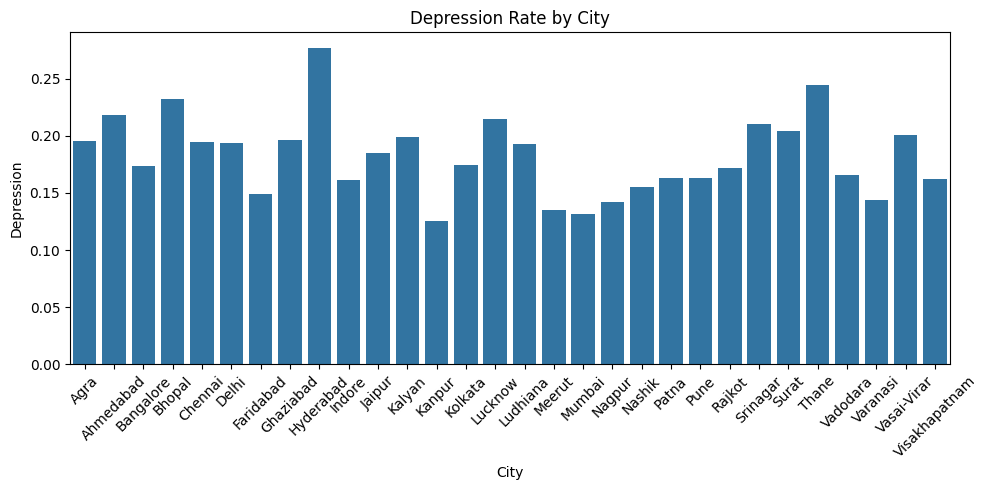

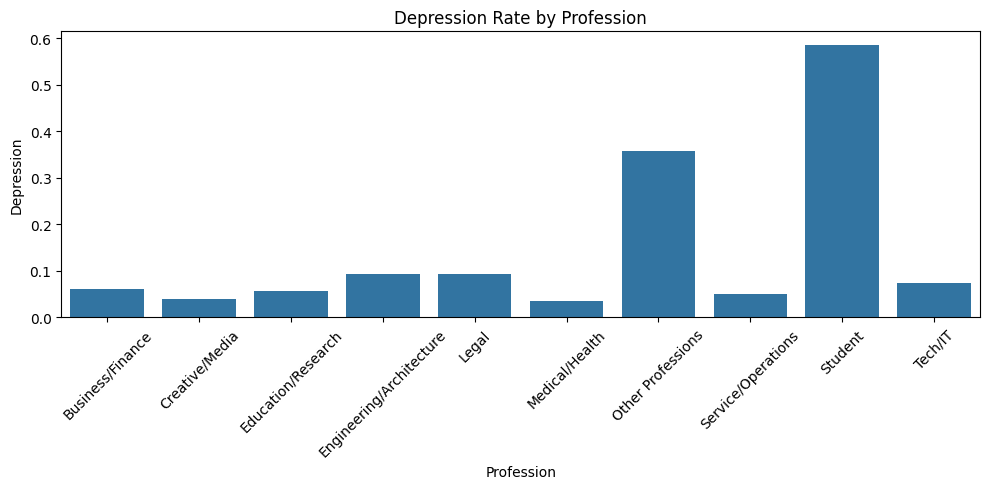

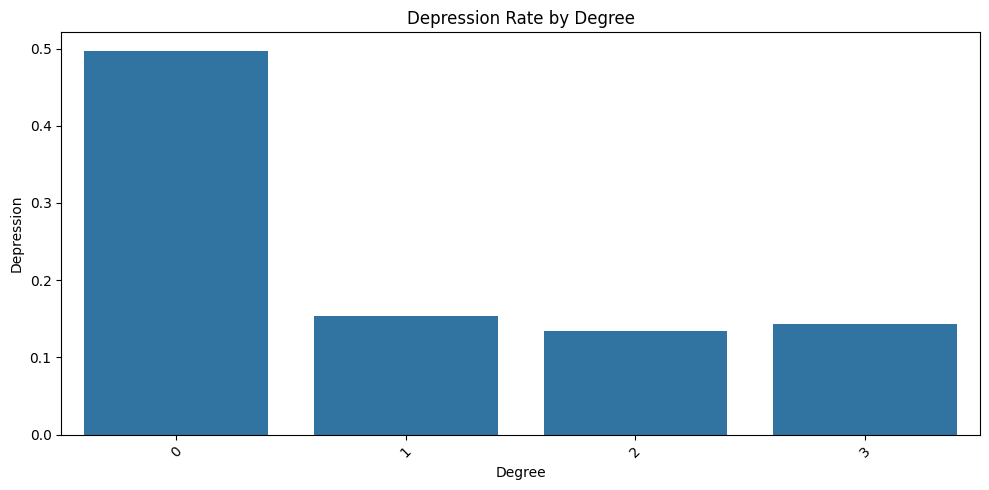

In [48]:
for col in nominal_categorical_features:
    # 2.1 Grouped Bar Chart – Depression Rate
    rate_df = cleaned_data.groupby(col)[target].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(data=rate_df, x=col, y="Depression")
    plt.xticks(rotation=45)
    plt.title(f"Depression Rate by {col}")
    plt.tight_layout()
    plt.show()

# 4. Interactions of groups of feature 

## 4.1. Academic Pressure × Study Satisfaction × Student

Empty DataFrame
Columns: [Group, Depression]
Index: []


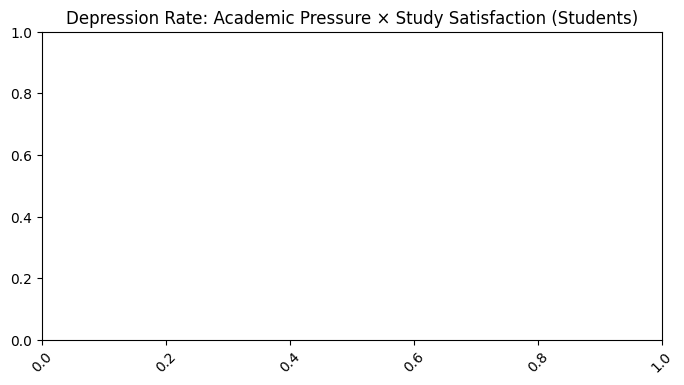

In [49]:
df = cleaned_data.copy()

# Filter: chỉ nhóm Student
df_student = df[df["Working Professional or Student"] == "Student"].copy()

df_student["Group"] = (
    "AcadP=" + df_student["Academic Pressure"].astype(str) +
    " | StudyS=" + df_student["Study Satisfaction"].astype(str)
)

# Depression rate
g1_rate = df_student.groupby("Group")["Depression"].mean().reset_index()
print(g1_rate)

# Visualization
plt.figure(figsize=(8,4))
sns.barplot(data=g1_rate, x="Group", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Academic Pressure × Study Satisfaction (Students)")
plt.show()


## 4.2. Work Pressure × Job Satisfaction × Working Professional

Empty DataFrame
Columns: [Group, Depression]
Index: []


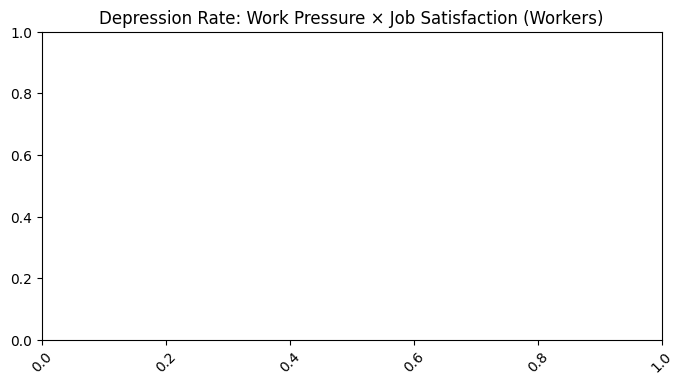

In [50]:
# Filter: Worker
df_worker = df[df["Working Professional or Student"] == "Working Professional"].copy()

df_worker["Group"] = (
    "WorkP=" + df_worker["Work Pressure"].astype(str) +
    " | JobS=" + df_worker["Job Satisfaction"].astype(str)
)

g2_rate = df_worker.groupby("Group")["Depression"].mean().reset_index()
print(g2_rate)

plt.figure(figsize=(8,4))
sns.barplot(data=g2_rate, x="Group", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Work Pressure × Job Satisfaction (Workers)")
plt.show()


## 4.3. Sleep Duration × Financial Stress

       Group_SleepFin  Depression
0   Sleep=0 | Fin=1.0    0.097198
1   Sleep=0 | Fin=2.0    0.114275
2   Sleep=0 | Fin=3.0    0.190818
3   Sleep=0 | Fin=4.0    0.250138
4   Sleep=0 | Fin=5.0    0.372601
5   Sleep=1 | Fin=1.0    0.084809
6   Sleep=1 | Fin=2.0    0.095475
7   Sleep=1 | Fin=3.0    0.174920
8   Sleep=1 | Fin=4.0    0.217741
9   Sleep=1 | Fin=5.0    0.328264
10  Sleep=2 | Fin=1.0    0.060372
11  Sleep=2 | Fin=2.0    0.079715
12  Sleep=2 | Fin=3.0    0.135811
13  Sleep=2 | Fin=4.0    0.169014
14  Sleep=2 | Fin=5.0    0.258689


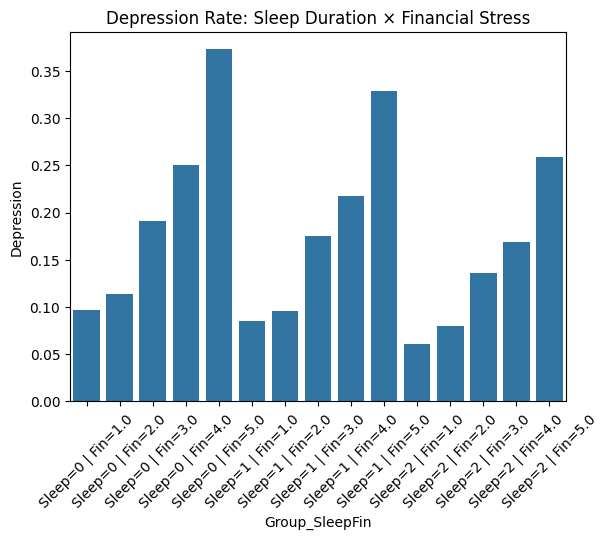

In [51]:
df["Group_SleepFin"] = (
    "Sleep=" + df["Sleep Duration"].astype(str) +
    " | Fin=" + df["Financial Stress"].astype(str)
)

g3_rate = df.groupby("Group_SleepFin")["Depression"].mean().reset_index()
print(g3_rate)

sns.barplot(data=g3_rate, x="Group_SleepFin", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Sleep Duration × Financial Stress")
plt.show()


## 4.4. Suicidal Thoughts × Family History of Mental Illness

              Group_Risk  Depression
0  Suicide=0 | FamHist=0    0.046898
1  Suicide=0 | FamHist=1    0.050103
2  Suicide=1 | FamHist=0    0.312115
3  Suicide=1 | FamHist=1    0.326144


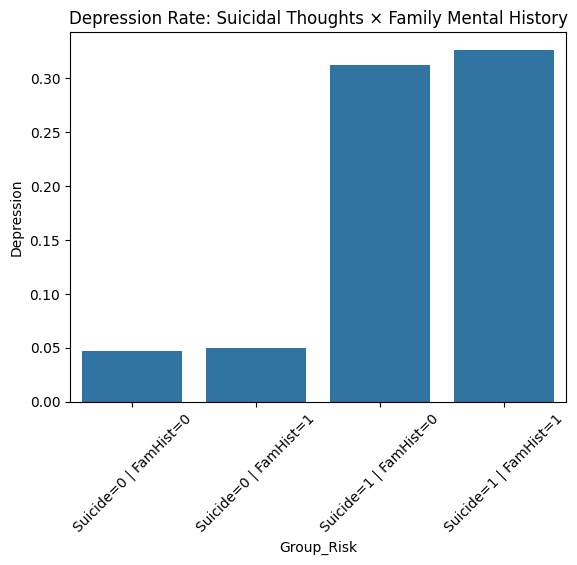

NameError: name 'compute_odds_ratio' is not defined

In [52]:
df["Group_Risk"] = (
    "Suicide=" + df["Have you ever had suicidal thoughts ?"].astype(str) +
    " | FamHist=" + df["Family History of Mental Illness"].astype(str)
)

g4_rate = df.groupby("Group_Risk")["Depression"].mean().reset_index()
print(g4_rate)

sns.barplot(data=g4_rate, x="Group_Risk", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Suicidal Thoughts × Family Mental History")
plt.show()

# Odds ratio
or4, ci4 = compute_odds_ratio(df, "Have you ever had suicidal thoughts ?")
print("Odds Ratio Suicidal Thoughts:", or4, ci4)


## 4.5. Work/Study Hours × Sleep Duration

                                 Group_HoursSleep  Depression
0                     Hours=0.0 | Sleep=6-8 hours    0.084398
1    Hours=0.0 | Sleep=Less than or equal 6 hours    0.090395
2             Hours=0.0 | Sleep=More than 8 hours    0.067901
3                     Hours=1.0 | Sleep=6-8 hours    0.082027
4    Hours=1.0 | Sleep=Less than or equal 6 hours    0.086485
5             Hours=1.0 | Sleep=More than 8 hours    0.061863
6                    Hours=10.0 | Sleep=6-8 hours    0.324311
7   Hours=10.0 | Sleep=Less than or equal 6 hours    0.354281
8            Hours=10.0 | Sleep=More than 8 hours    0.245981
9                    Hours=11.0 | Sleep=6-8 hours    0.236596
10  Hours=11.0 | Sleep=Less than or equal 6 hours    0.277394
11           Hours=11.0 | Sleep=More than 8 hours    0.189464
12                   Hours=12.0 | Sleep=6-8 hours    0.301775
13  Hours=12.0 | Sleep=Less than or equal 6 hours    0.333428
14           Hours=12.0 | Sleep=More than 8 hours    0.238600
15      

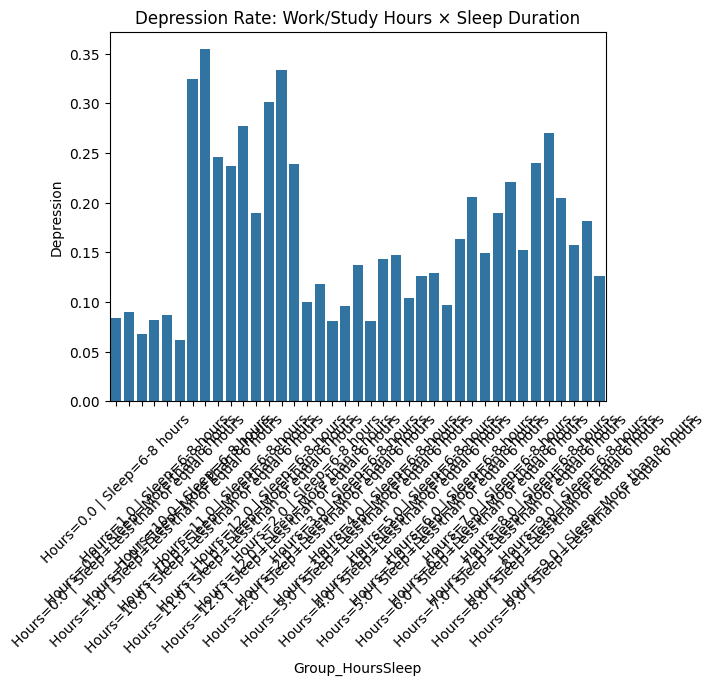

In [55]:
df["Group_HoursSleep"] = (
    "Hours=" + df["Work/Study Hours"].astype(str) +
    " | Sleep=" + df["Sleep Duration"].astype(str)
)

g5_rate = df.groupby("Group_HoursSleep")["Depression"].mean().reset_index()
print(g5_rate)

sns.barplot(data=g5_rate, x="Group_HoursSleep", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Work/Study Hours × Sleep Duration")
plt.show()


## 4.6. Dietary Habits × Sleep Duration

                                     Group_DietSleep  Depression
0                     Diet=Healthy | Sleep=6-8 hours    0.118921
1    Diet=Healthy | Sleep=Less than or equal 6 hours    0.134337
2             Diet=Healthy | Sleep=More than 8 hours    0.084234
3                    Diet=Moderate | Sleep=6-8 hours    0.157535
4   Diet=Moderate | Sleep=Less than or equal 6 hours    0.187413
5            Diet=Moderate | Sleep=More than 8 hours    0.127648
6                   Diet=Unhealthy | Sleep=6-8 hours    0.257409
7  Diet=Unhealthy | Sleep=Less than or equal 6 hours    0.286951
8           Diet=Unhealthy | Sleep=More than 8 hours    0.211848


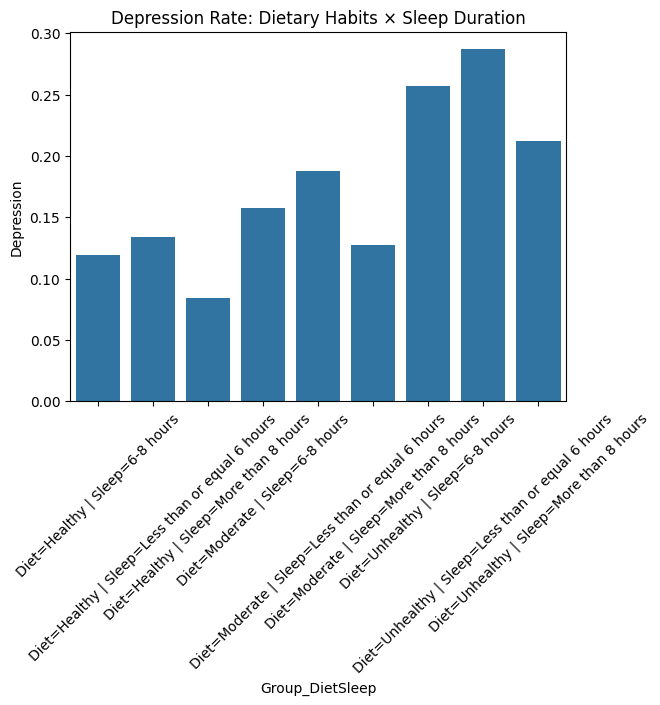

In [56]:
df["Group_DietSleep"] = (
    "Diet=" + df["Dietary Habits"].astype(str) +
    " | Sleep=" + df["Sleep Duration"].astype(str)
)

g6_rate = df.groupby("Group_DietSleep")["Depression"].mean().reset_index()
print(g6_rate)

sns.barplot(data=g6_rate, x="Group_DietSleep", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Dietary Habits × Sleep Duration")
plt.show()


## 4.7. Financial Stress × Job Satisfaction (Workers)

            Group_FinJob  Depression
0   Fin=1.0 | JobSat=1.0    0.064172
1   Fin=1.0 | JobSat=2.0    0.037946
2   Fin=1.0 | JobSat=3.0    0.017671
3   Fin=1.0 | JobSat=4.0    0.018350
4   Fin=1.0 | JobSat=5.0    0.012625
5   Fin=2.0 | JobSat=1.0    0.081227
6   Fin=2.0 | JobSat=2.0    0.045705
7   Fin=2.0 | JobSat=3.0    0.024577
8   Fin=2.0 | JobSat=4.0    0.023773
9   Fin=2.0 | JobSat=5.0    0.021471
10  Fin=3.0 | JobSat=1.0    0.144306
11  Fin=3.0 | JobSat=2.0    0.089406
12  Fin=3.0 | JobSat=3.0    0.045073
13  Fin=3.0 | JobSat=4.0    0.032434
14  Fin=3.0 | JobSat=5.0    0.033975
15  Fin=4.0 | JobSat=1.0    0.211576
16  Fin=4.0 | JobSat=2.0    0.113461
17  Fin=4.0 | JobSat=3.0    0.061034
18  Fin=4.0 | JobSat=4.0    0.049497
19  Fin=4.0 | JobSat=5.0    0.050729
20  Fin=5.0 | JobSat=1.0    0.352421
21  Fin=5.0 | JobSat=2.0    0.216635
22  Fin=5.0 | JobSat=3.0    0.131697
23  Fin=5.0 | JobSat=4.0    0.092659
24  Fin=5.0 | JobSat=5.0    0.083892


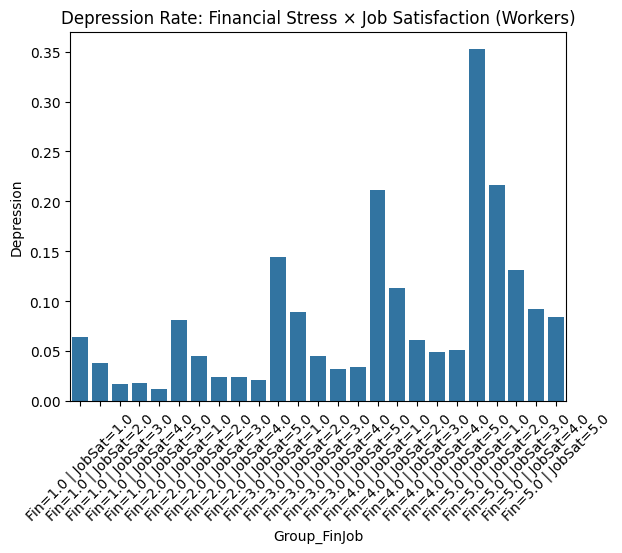

In [57]:
df_worker["Group_FinJob"] = (
    "Fin=" + df_worker["Financial Stress"].astype(str) +
    " | JobSat=" + df_worker["Job Satisfaction"].astype(str)
)

g7_rate = df_worker.groupby("Group_FinJob")["Depression"].mean().reset_index()
print(g7_rate)

sns.barplot(data=g7_rate, x="Group_FinJob", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Financial Stress × Job Satisfaction (Workers)")
plt.show()


## 4.8. Academic Pressure × CGPA (Students only)

            Group_AcadGPA  Depression
0    AcadP=1.0 | GPA=High    0.215441
1  AcadP=1.0 | GPA=Medium    0.178249
2    AcadP=2.0 | GPA=High    0.391856
3  AcadP=2.0 | GPA=Medium    0.365385
4    AcadP=3.0 | GPA=High    0.625663
5  AcadP=3.0 | GPA=Medium    0.580401
6    AcadP=4.0 | GPA=High    0.783983
7  AcadP=4.0 | GPA=Medium    0.741390
8    AcadP=5.0 | GPA=High    0.868742
9  AcadP=5.0 | GPA=Medium    0.856010


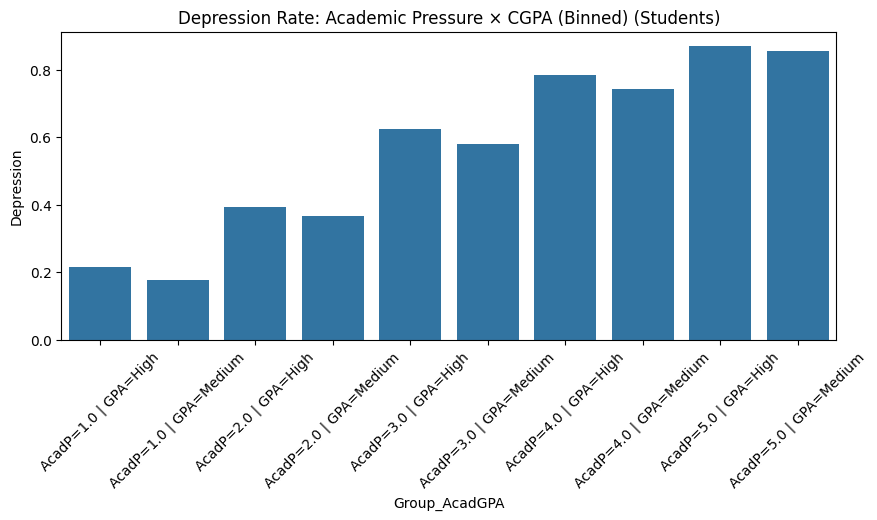

In [58]:
df_student["CGPA_bin"] = pd.cut(
    df_student["CGPA"],
    bins=[0, 5, 8, 10],
    labels=["Low", "Medium", "High"],
    include_lowest=True
)
df_student["Group_AcadGPA"] = (
    "AcadP=" + df_student["Academic Pressure"].astype(str) +
    " | GPA=" + df_student["CGPA_bin"].astype(str)
)
g8_rate = df_student.groupby("Group_AcadGPA")["Depression"].mean().reset_index()
print(g8_rate)
plt.figure(figsize=(10,4))
sns.barplot(data=g8_rate, x="Group_AcadGPA", y="Depression")
plt.xticks(rotation=45)
plt.title("Depression Rate: Academic Pressure × CGPA (Binned) (Students)")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6527928-bbf4-4c9a-8760-1f30ce0e5ba3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>